# Import & read

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import missingno as msno

from features_eng import create_lag, full_df

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Zindi            86584 non-null  object 
 1   Date                86584 non-null  object 
 2   ID                  86584 non-null  object 
 3   LAT                 86584 non-null  float64
 4   LON                 86584 non-null  float64
 5   Precipitation       86584 non-null  float64
 6   LST                 46798 non-null  float64
 7   AAI                 73709 non-null  float64
 8   CloudFraction       73709 non-null  float64
 9   NO2_strat           73709 non-null  float64
 10  NO2_total           73709 non-null  float64
 11  NO2_trop            51111 non-null  float64
 12  TropopausePressure  73709 non-null  float64
 13  GT_NO2              82051 non-null  float64
dtypes: float64(11), object(3)
memory usage: 9.2+ MB


In [4]:
train.describe().T


count          mean          std          min  \
LAT                 86584.0     45.421456     0.225409    44.924694   
LON                 86584.0     10.014272     1.056637     8.736497   
Precipitation       86584.0      2.585528     7.617394     0.000000   
LST                 46798.0    299.268841    10.927167   253.200000   
AAI                 73709.0     -1.274999     0.693003    -5.196266   
CloudFraction       73709.0      0.200606     0.259607     0.000000   
NO2_strat           73709.0      0.000045     0.000012     0.000013   
NO2_total           73709.0      0.000156     0.000103    -0.000012   
NO2_trop            51111.0      0.000105     0.000092    -0.000025   
TropopausePressure  73709.0  16655.112392  3000.748790  8614.349685   
GT_NO2              82051.0     24.535051    17.108838     0.000000   

                             25%           50%           75%           max  
LAT                    45.249544     45.478996     45.601232     45.889734  
LON                     9.195325      9.611738     10.683357     12.590682  
Precipitation           0.000000      0.000000      0.000000    135.396805  
LST                   290.920000    300.760000    307.940000    327.840000  
AAI                    -1.749425     -1.349746     -0.878857      2.143020  
CloudFraction           0.023900      0.078478      0.278451      1.000000  
NO2_strat               0.000034      0.000047      0.000056      0.000073  
NO2_total               0.000100      0.000122      0.000173      0.002047  
NO2_trop                0.000047      0.000071      0.000129      0.001097  
TropopausePressure  14432.114060  16711.190570  19252.648570  24449.007150  
GT_NO2                 11.875000     20.000000     33.050000    188.233333

# Missing

<Axes: >

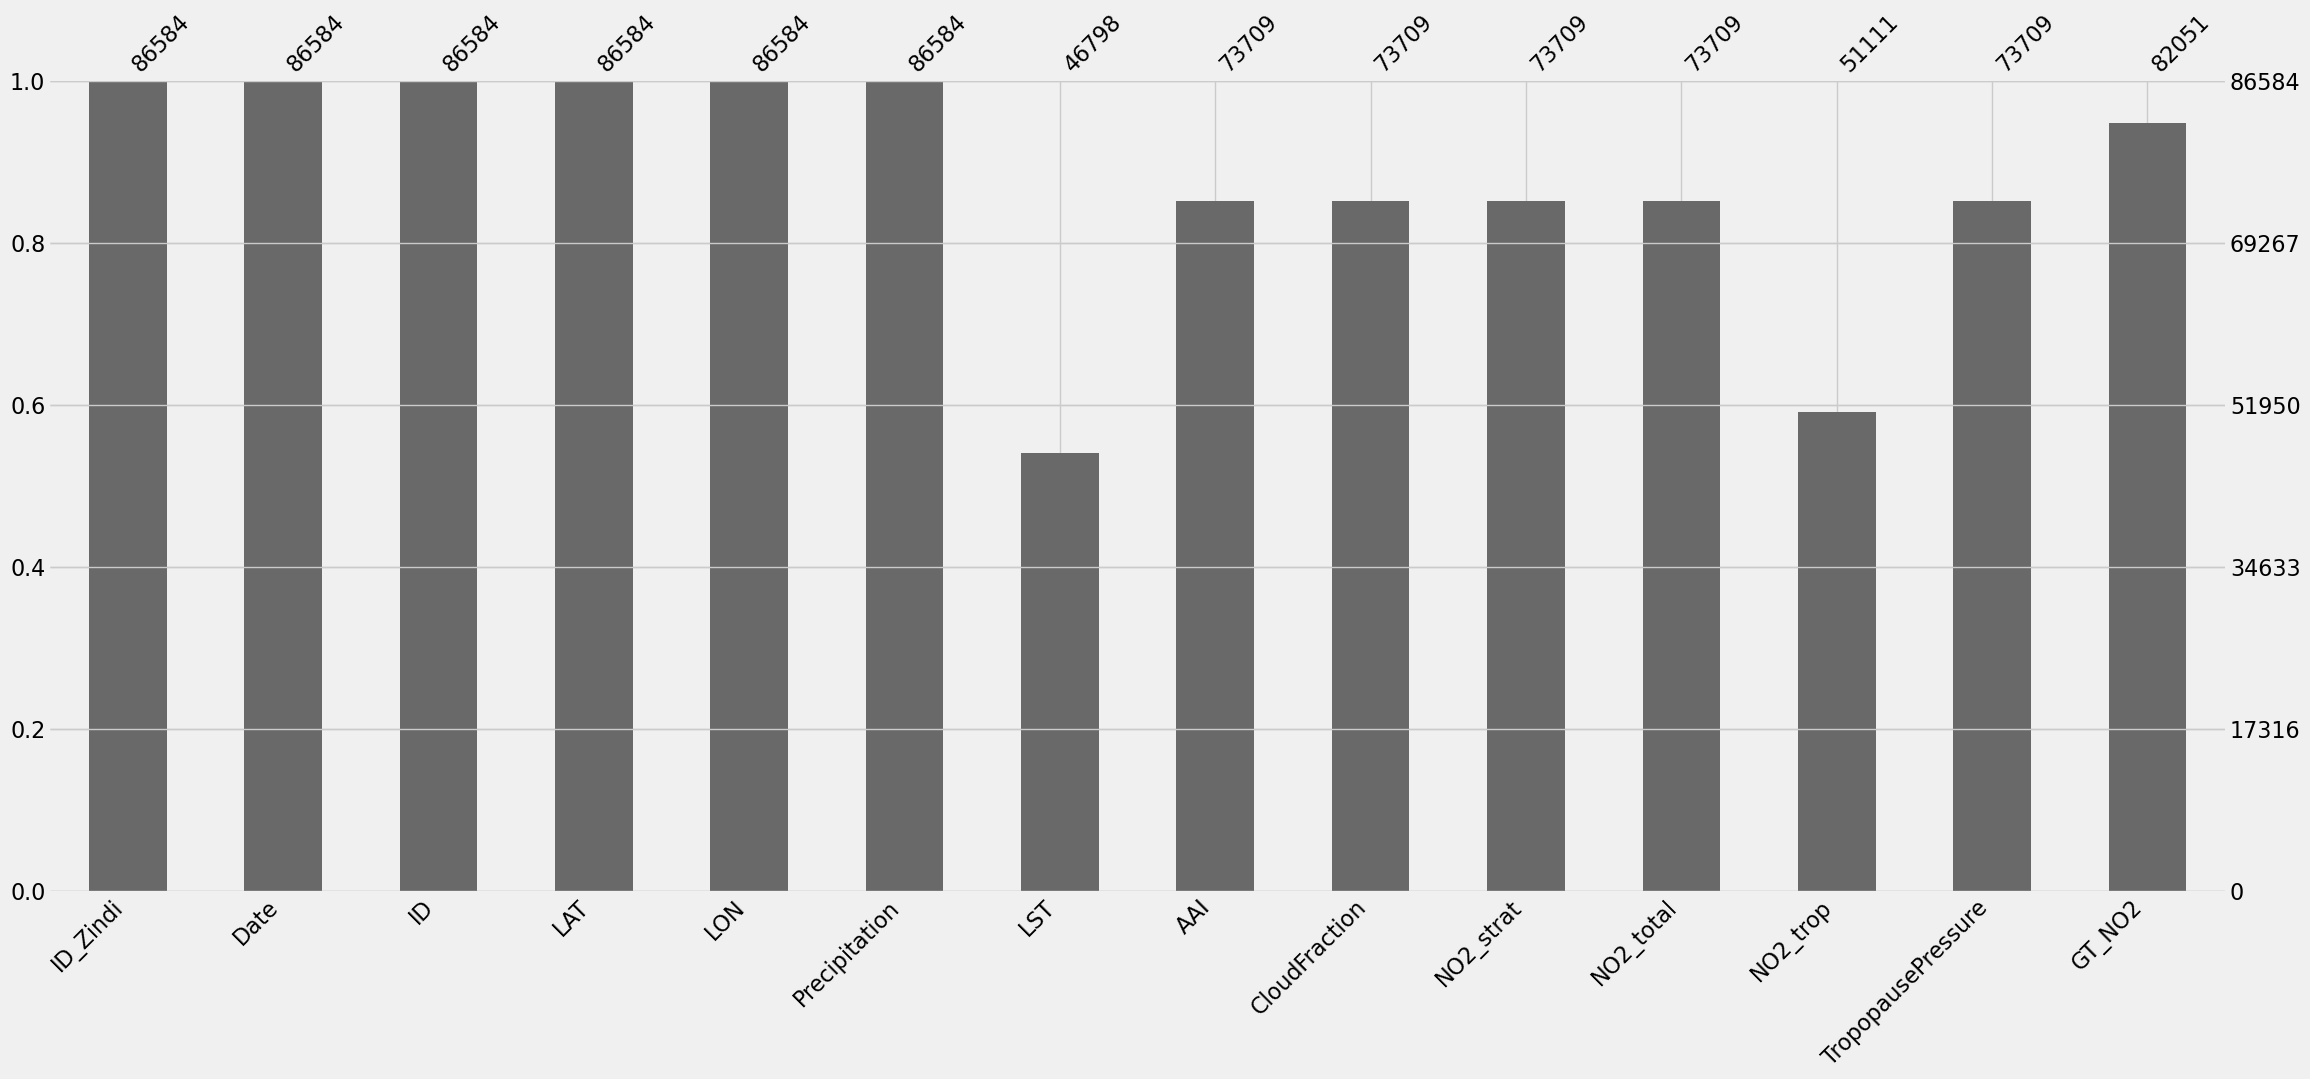

In [5]:
import missingno as msno
msno.bar(train)

<Axes: >

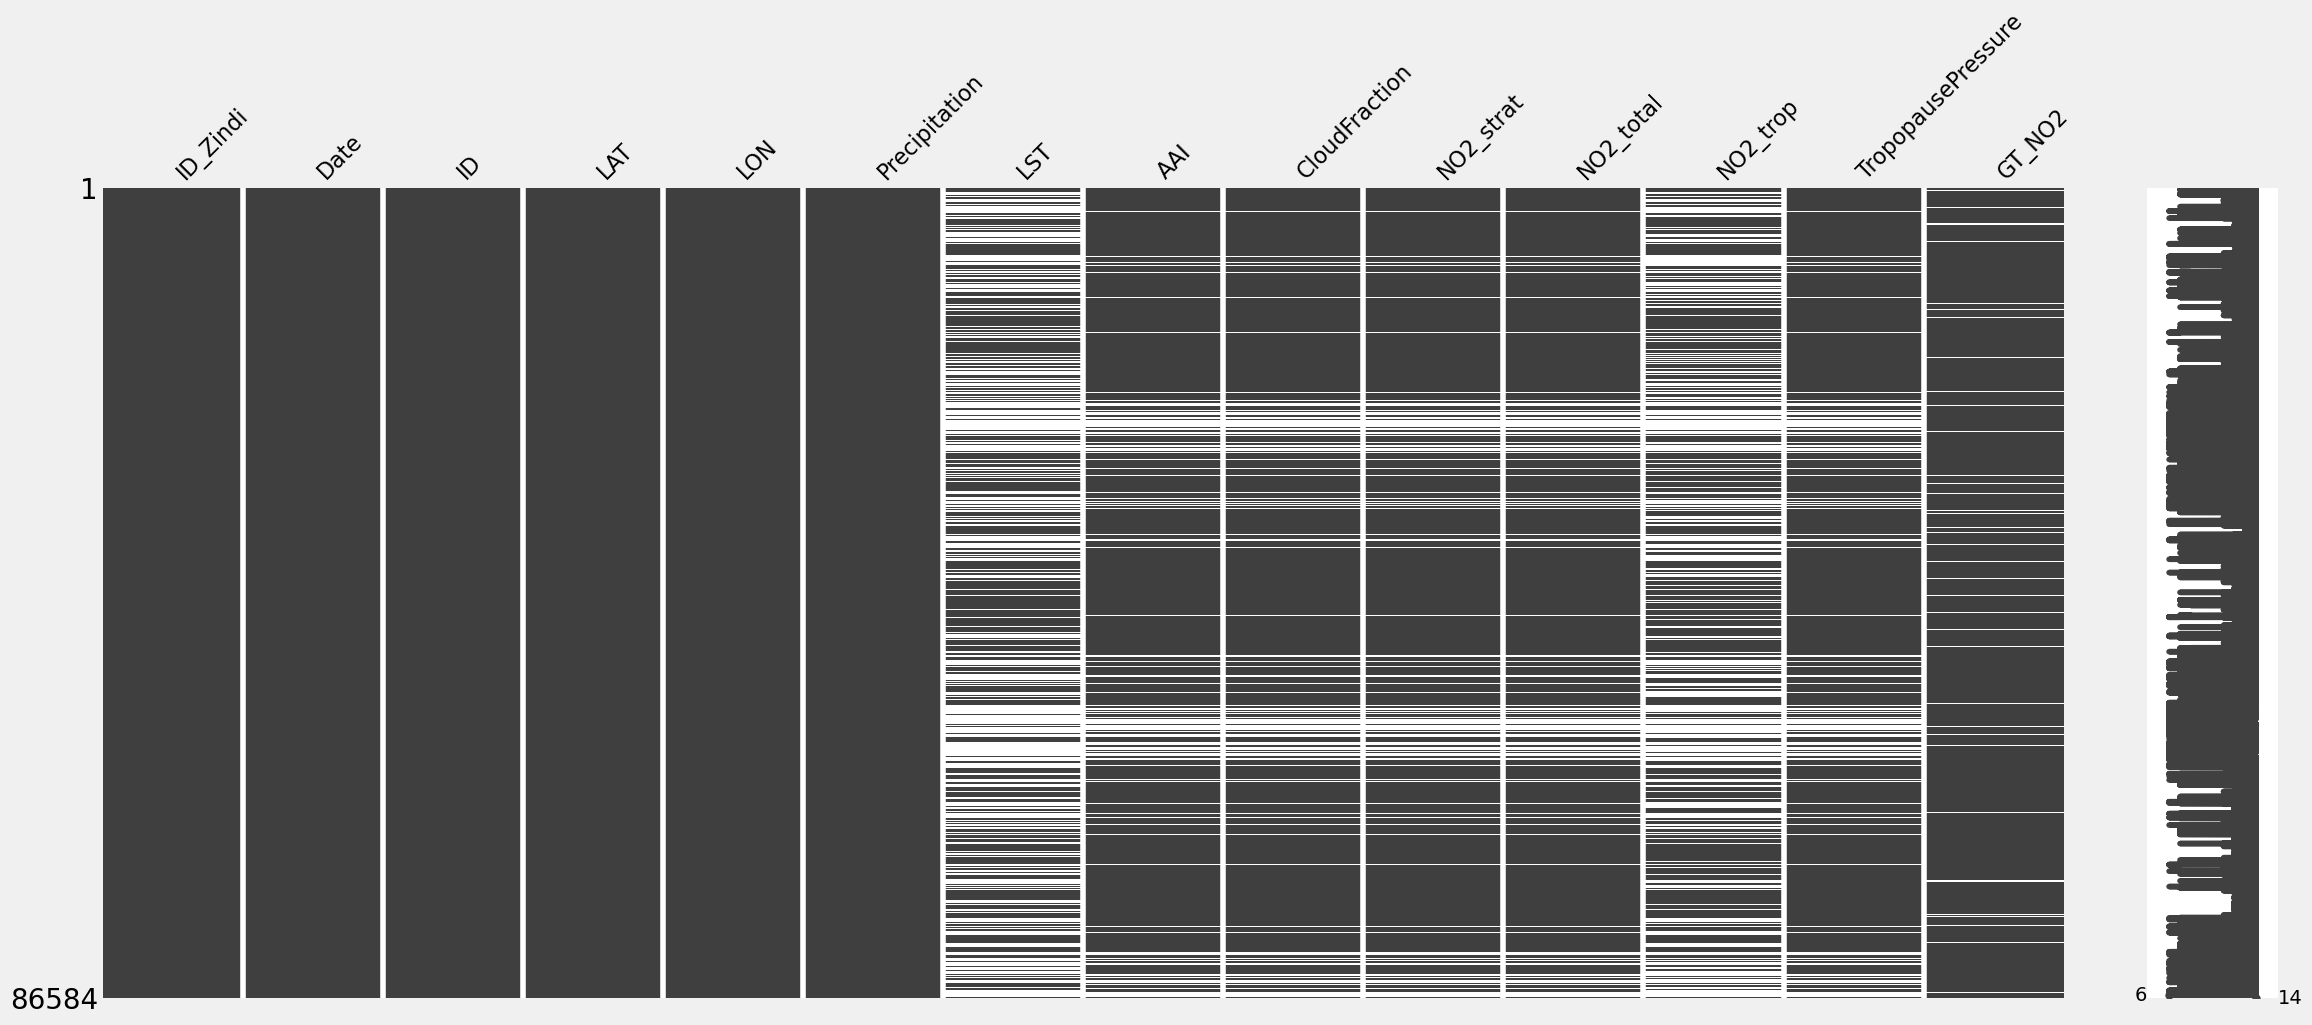

In [6]:
msno.matrix(train)


<Axes: >

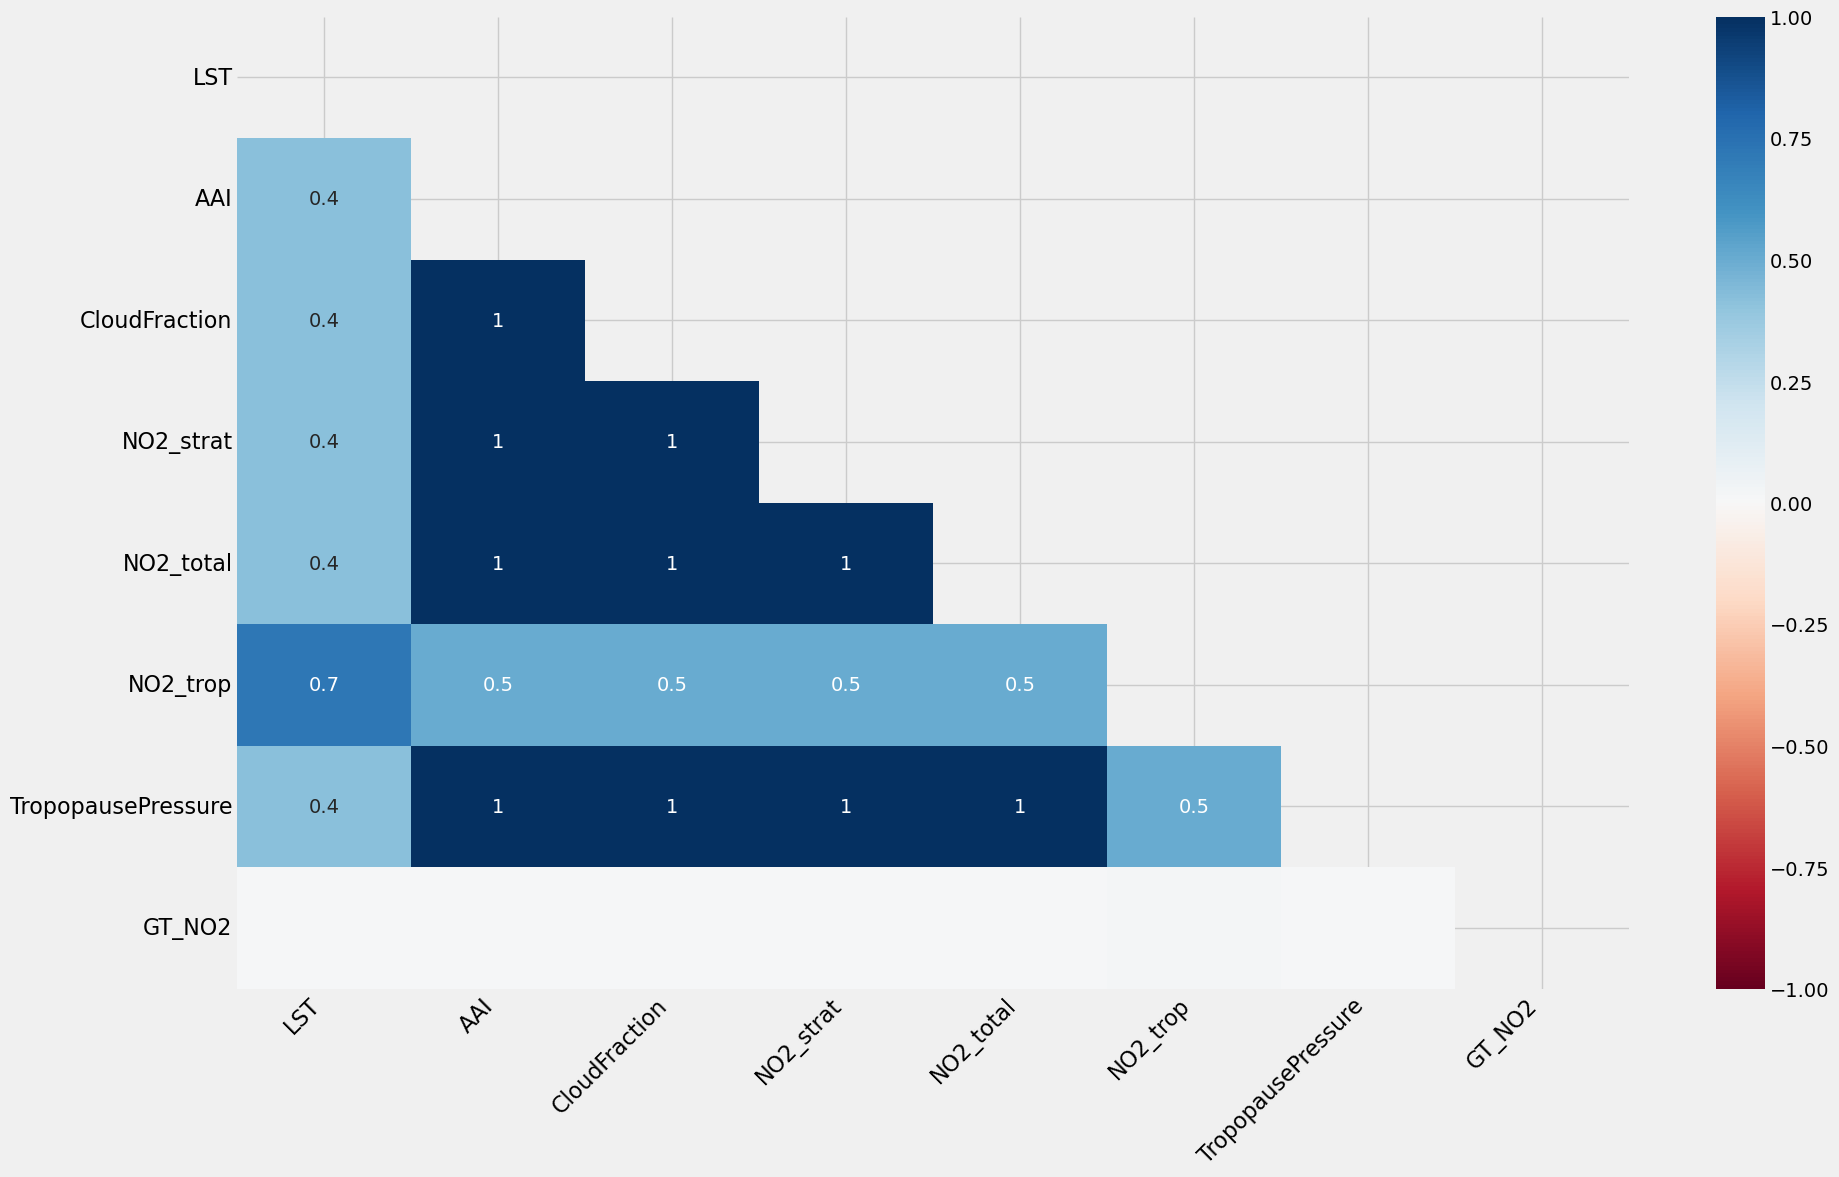

In [7]:
msno.heatmap(train)

# EDA 

## Univariate 

In [8]:
num_df = train.select_dtypes(include=np.number)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LAT                 86584 non-null  float64
 1   LON                 86584 non-null  float64
 2   Precipitation       86584 non-null  float64
 3   LST                 46798 non-null  float64
 4   AAI                 73709 non-null  float64
 5   CloudFraction       73709 non-null  float64
 6   NO2_strat           73709 non-null  float64
 7   NO2_total           73709 non-null  float64
 8   NO2_trop            51111 non-null  float64
 9   TropopausePressure  73709 non-null  float64
 10  GT_NO2              82051 non-null  float64
dtypes: float64(11)
memory usage: 7.3 MB


In [9]:
def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\1706145024.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')


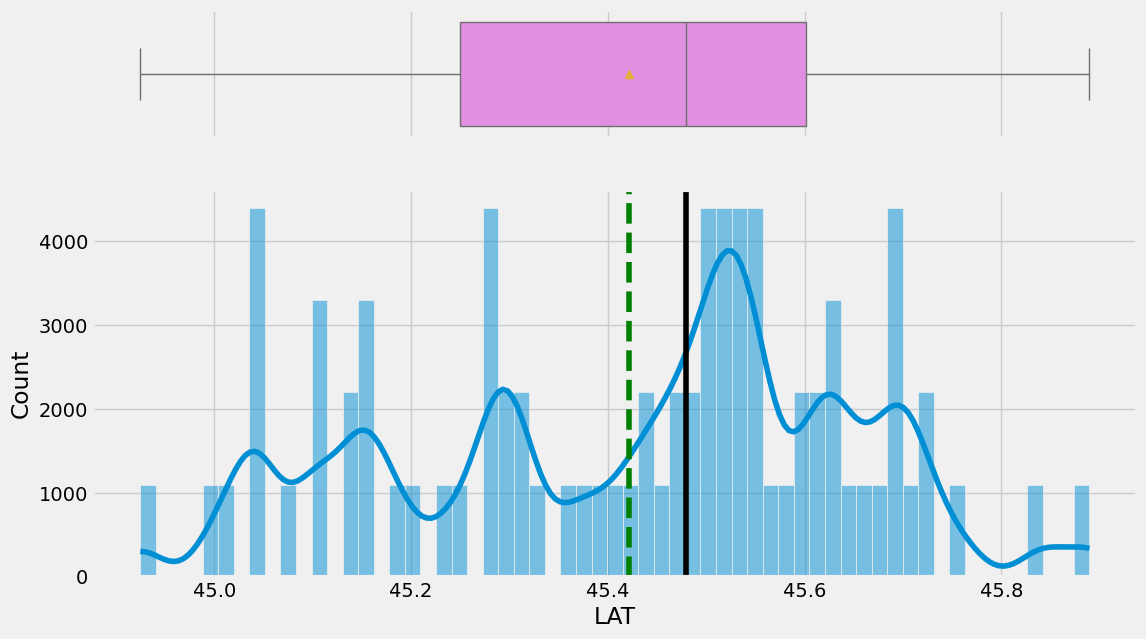

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\1706145024.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')


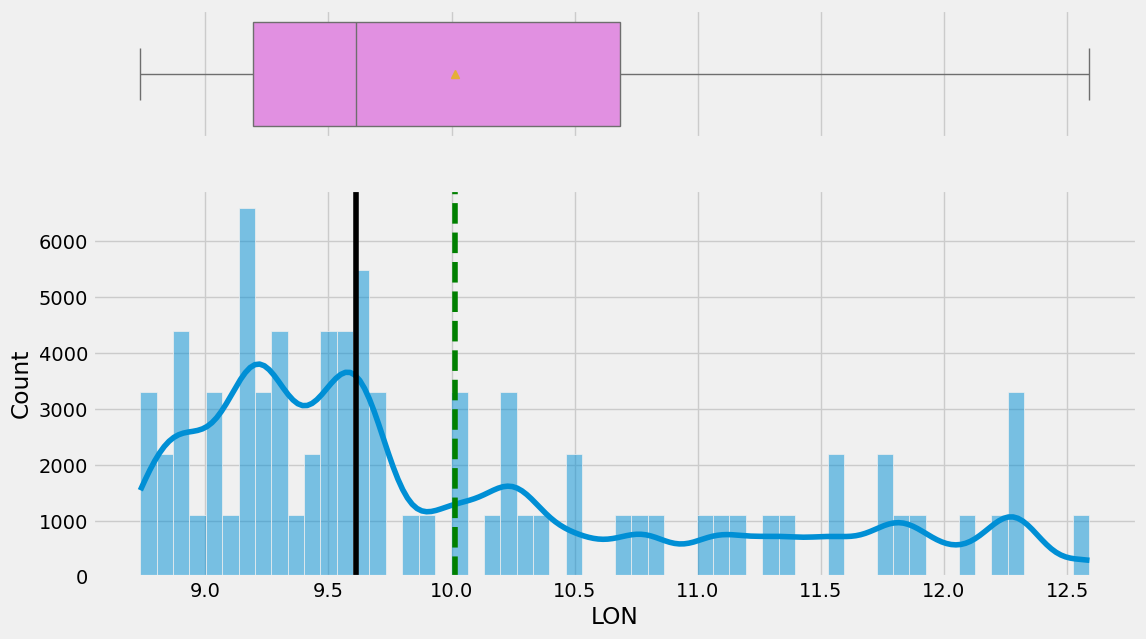

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\1706145024.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')


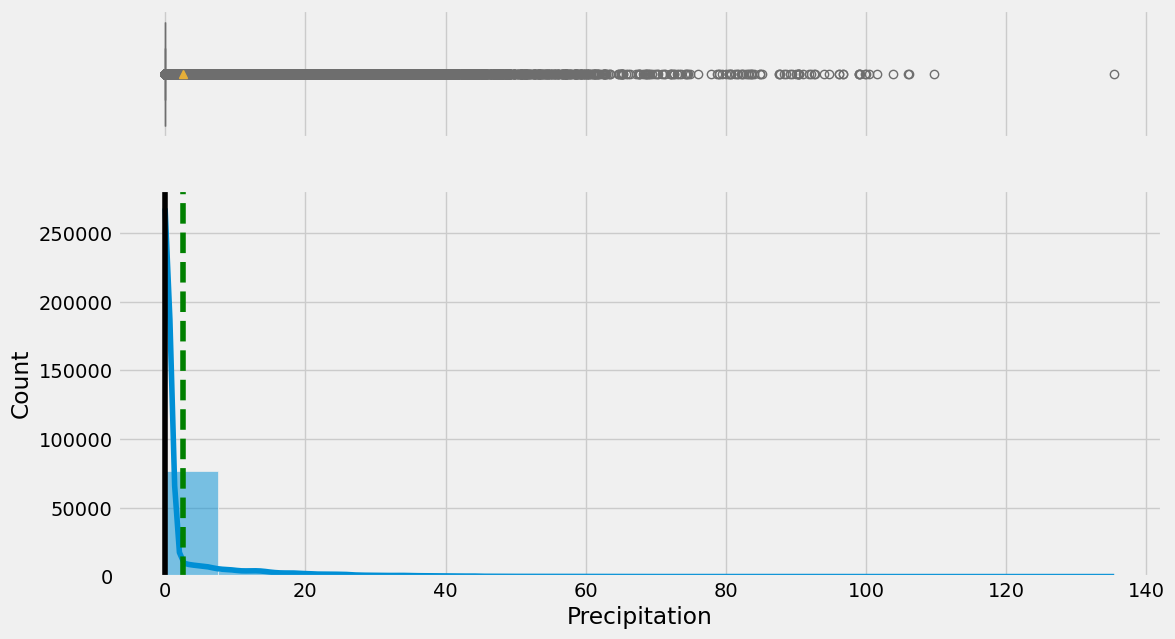

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\1706145024.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')


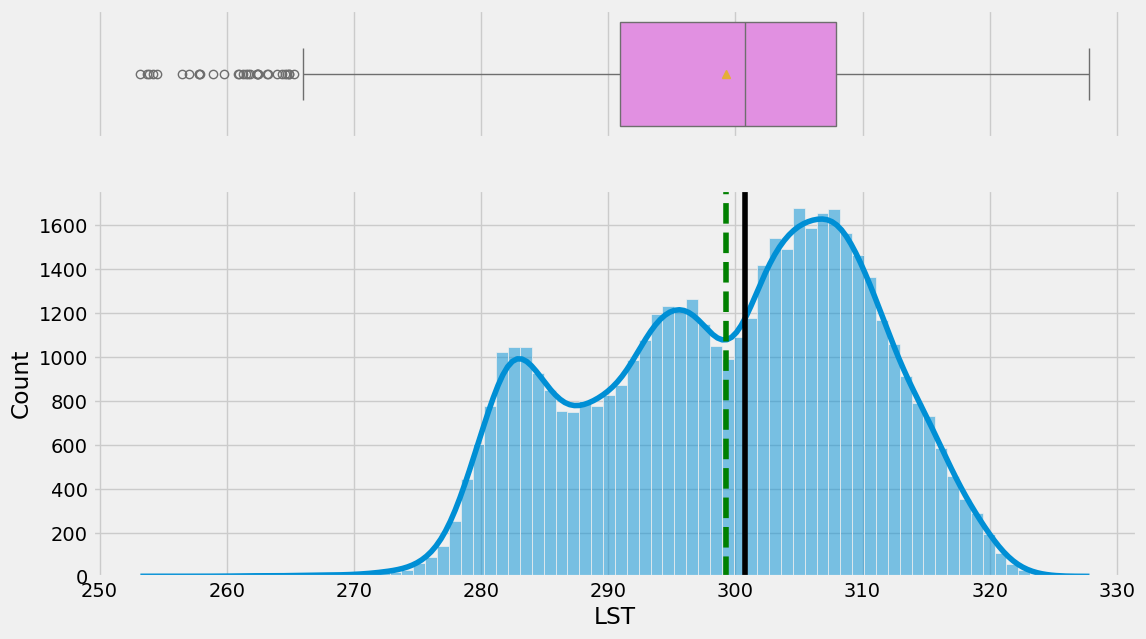

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\1706145024.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')


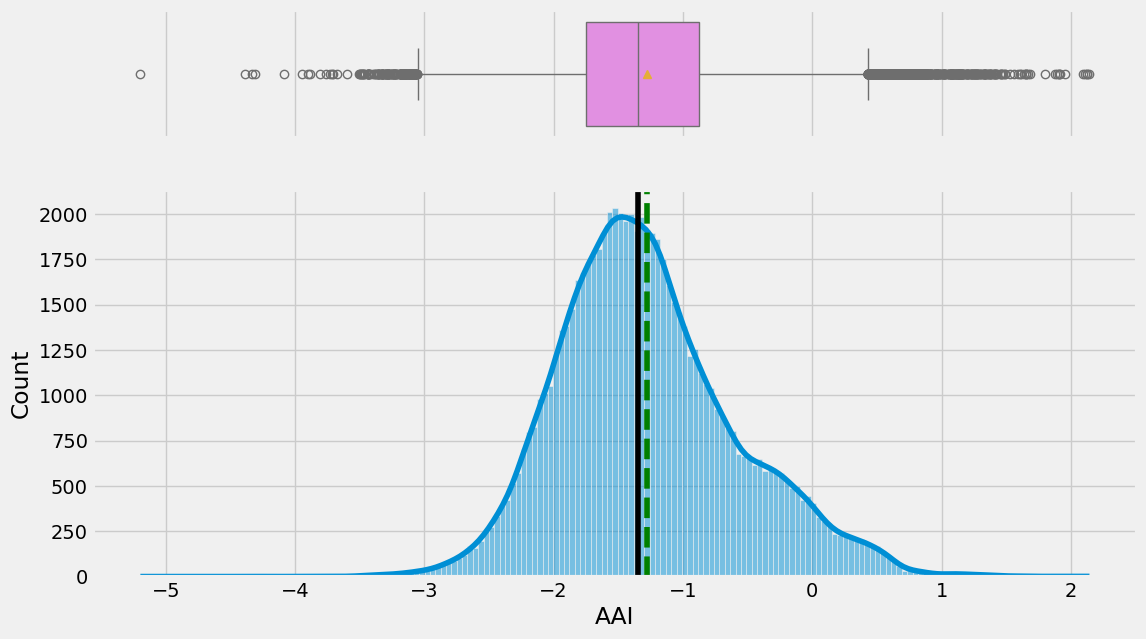

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\1706145024.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')


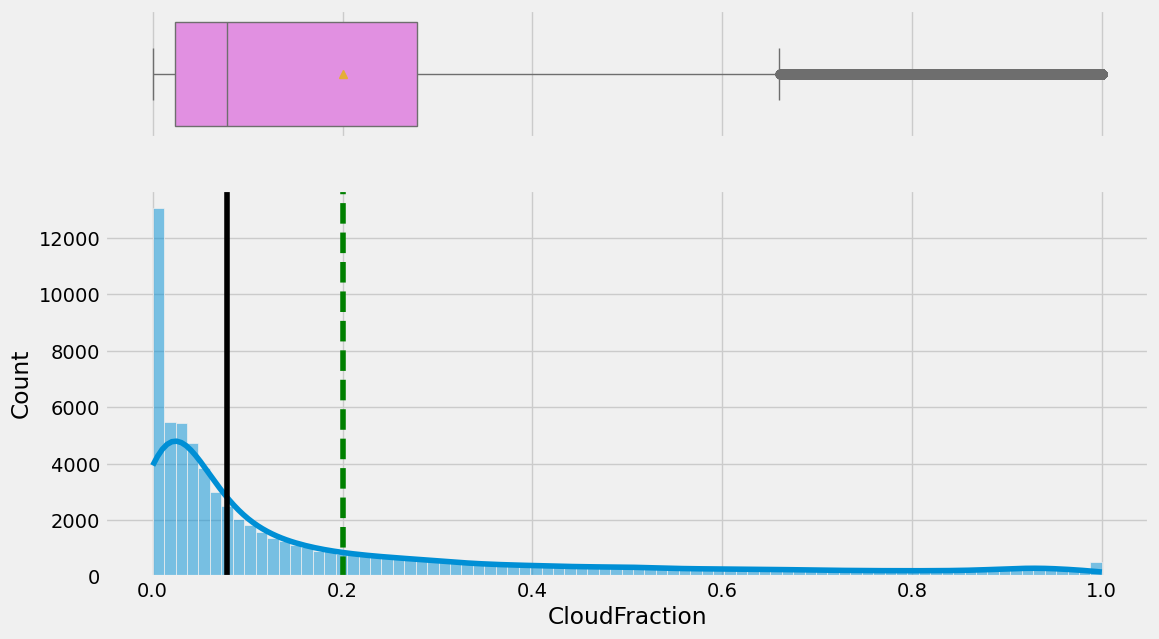

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\1706145024.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')


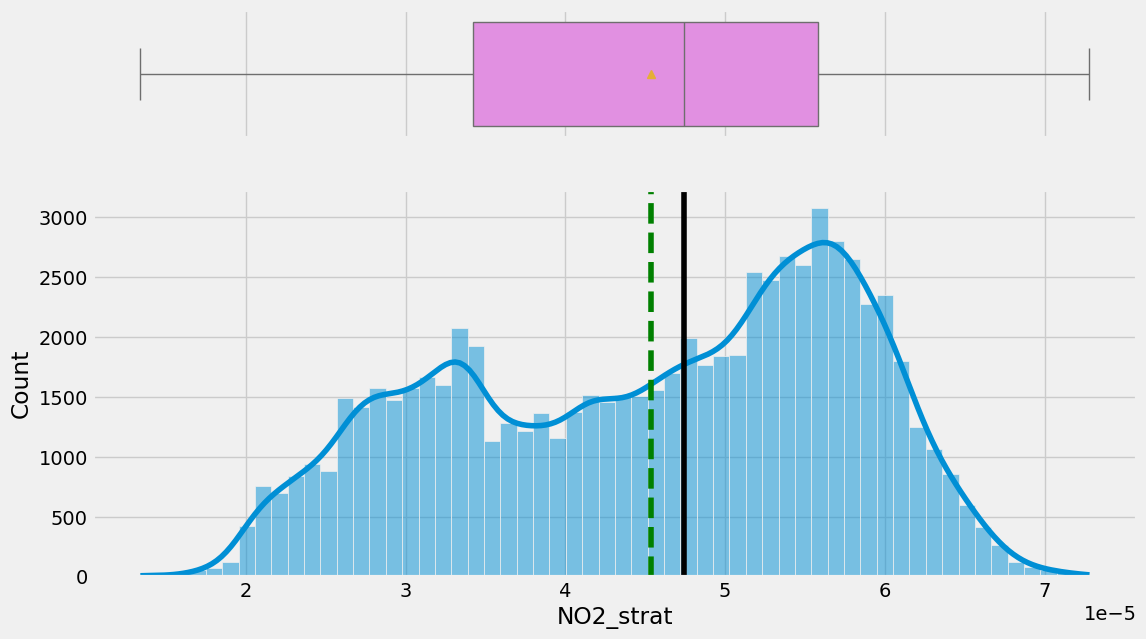

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\1706145024.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')


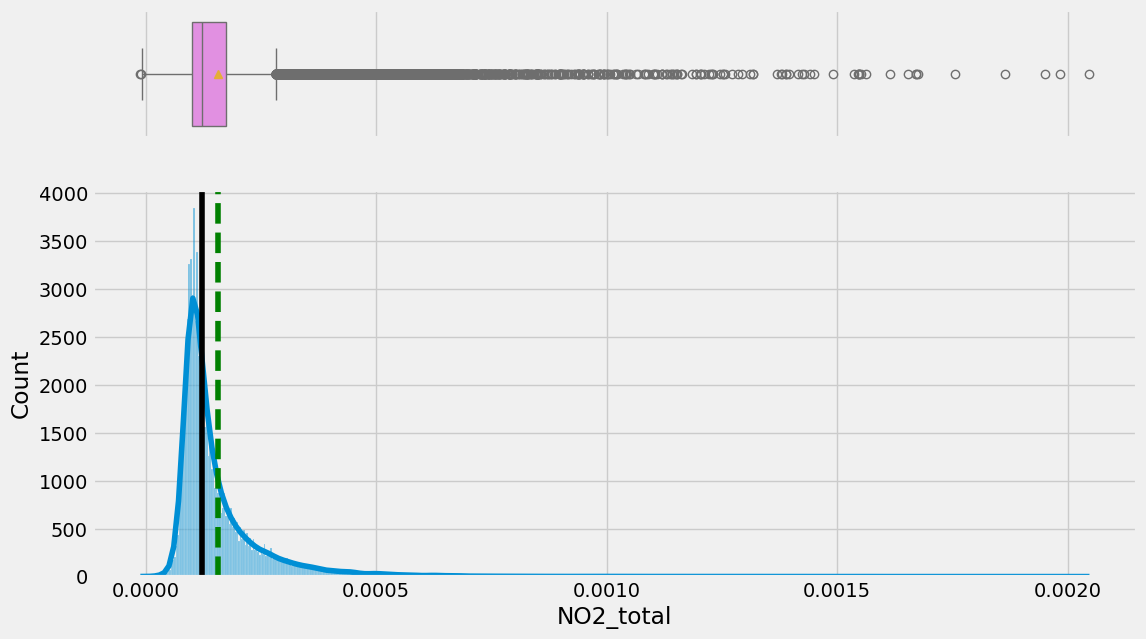

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\1706145024.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')


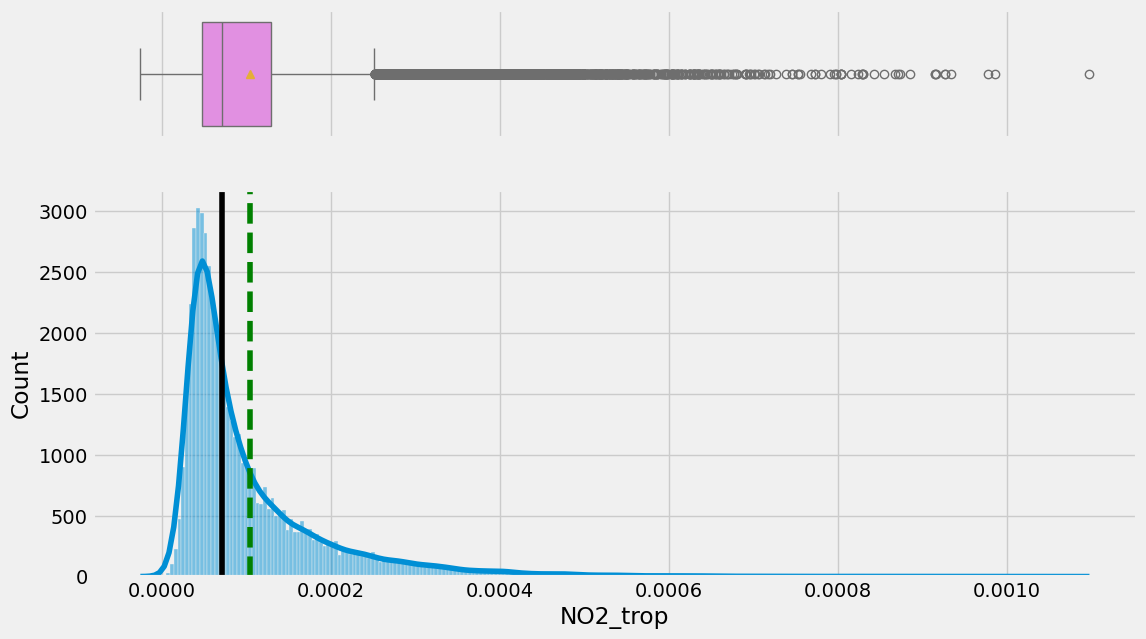

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\1706145024.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')


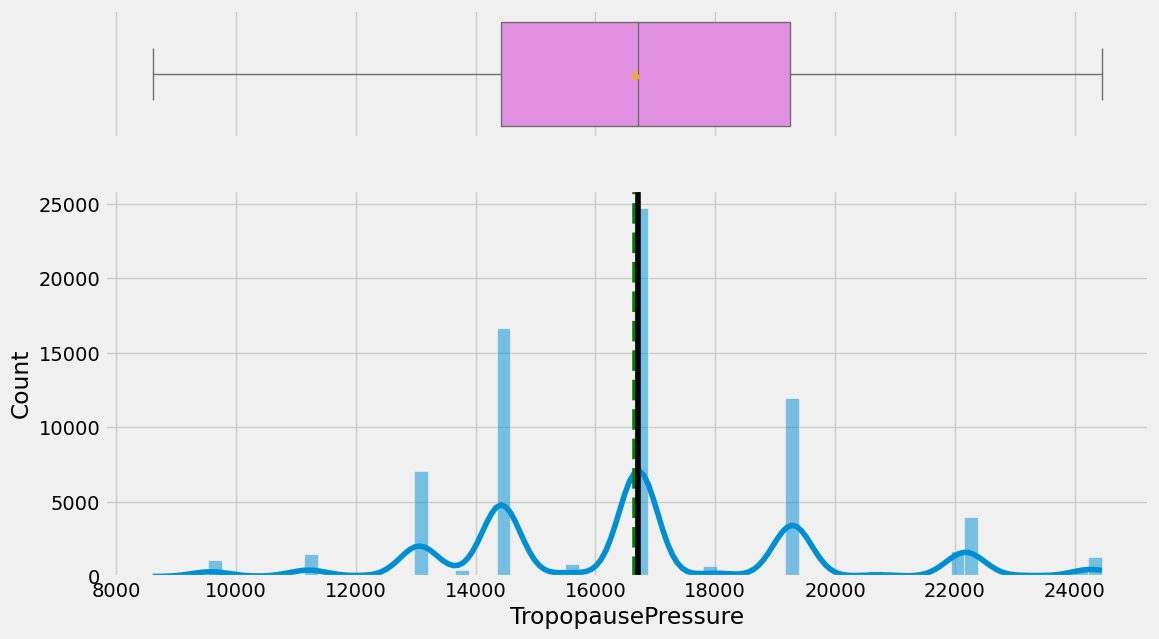

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\1706145024.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')


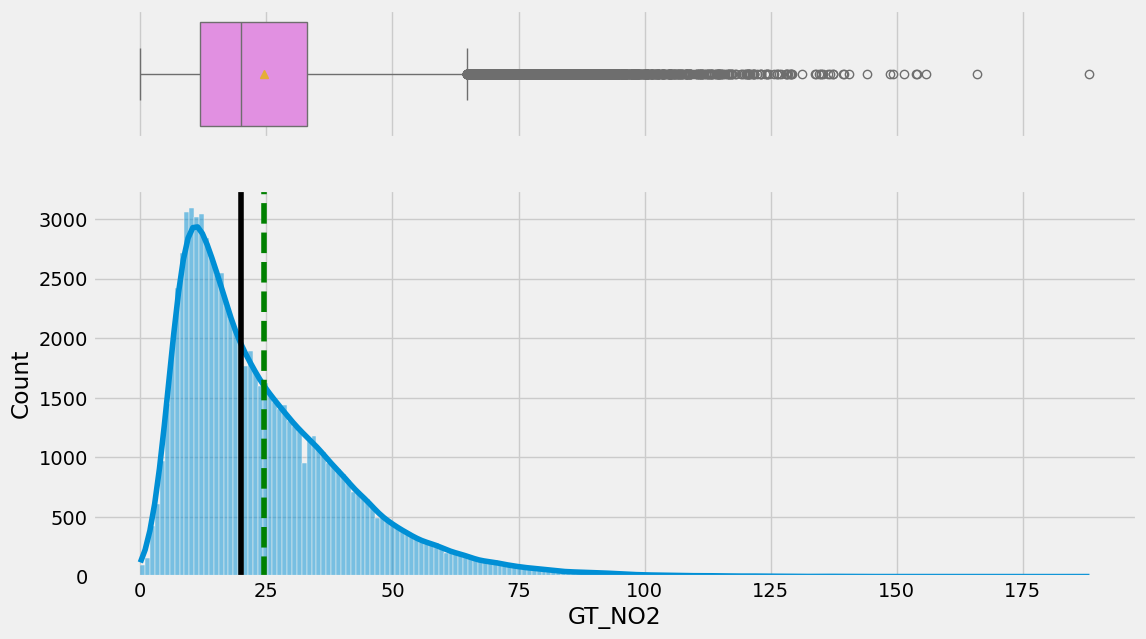

In [10]:
for i in num_df.columns:
    hist_boxplot(num_df, i)
    plt.show()

* NO 2 total & NO2 trop < 0 ?

In [11]:
train[train['NO2_total'] < 0 ]

ID_Zindi      Date     ID        LAT        LON  Precipitation  \
693    ID_RMJ9P7    9/1/19  X5958  45.366309   9.703946       2.912155   
706    ID_X3UMQL    9/1/19  X9897  45.498227   9.556232       5.129188   
2062   ID_9YW6HZ  27-01-19   VE02  45.499618  12.261249       2.911954   
3244   ID_2ANYW0   11/2/19   TV01  45.889734  12.307124       2.929047   
59571  ID_M1E4NO  24-01-21   TV01  45.889734  12.307124       3.256345   
59611  ID_CRZG31  24-01-21  X5557  45.627357   9.026401       0.000000   

          LST       AAI  CloudFraction  NO2_strat  NO2_total  NO2_trop  \
693       NaN -1.076730       0.473643   0.000032  -0.000007       NaN   
706       NaN -0.845338       0.731448   0.000032  -0.000009       NaN   
2062      NaN -0.953629       0.729615   0.000030  -0.000003       NaN   
3244      NaN -1.160029       0.702282   0.000042  -0.000002       NaN   
59571  279.12 -2.041876       0.197037   0.000031  -0.000010  0.000021   
59611     NaN -2.276645       0.220792   0.000031  -0.000012       NaN   

       TropopausePressure  GT_NO2  
693           24333.06556  42.475  
706           24323.80507  16.475  
2062          19266.77636  49.000  
3244          24222.63700  34.000  
59571         22079.85522  29.000  
59611         22075.75807  17.000

In [12]:
train[train['NO2_trop'] < 0 ]

ID_Zindi      Date      ID        LAT        LON  Precipitation  \
28411  ID_YRJGZ0  26-12-19   X5591  45.716300  10.044766            0.0   
59612  ID_M33NQO  24-01-21   X5568  45.730837   9.125734            0.0   
59642  ID_ECQDLF  24-01-21   X9969  45.842207   9.351658            0.0   
59658  ID_ZJB463  25-01-21    VR02  45.182626  11.310511            0.0   
71124  ID_4NYULE  19-06-21  X10458  45.233494   9.666250            0.0   
72382  ID_GA49D9    5/7/21  X10097  45.046502  11.180936            0.0   

          LST       AAI  CloudFraction  NO2_strat  NO2_total      NO2_trop  \
28411     NaN -1.120340       0.090115   0.000028   0.000024 -3.410000e-06   
59612  279.66 -1.730232       0.159323   0.000031   0.000027 -3.790000e-06   
59642     NaN -2.011505       0.158856   0.000031   0.000026 -5.060000e-06   
59658     NaN -1.951611       0.248553   0.000029   0.000051 -2.530000e-05   
71124     NaN -1.123964       0.286428   0.000059   0.000073 -3.650000e-07   
72382     NaN -1.161608       0.022313   0.000063   0.000060 -3.120000e-06   

       TropopausePressure  GT_NO2  
28411         14416.17286   4.975  
59612         22027.81204  11.650  
59642         22006.63457   8.425  
59658         19283.91055  35.000  
71124         14435.95410   9.200  
72382         14430.02613   5.175

In [13]:
train['NO2_total'] = train['NO2_total'].clip(lower=0)
train['NO2_trop'] = train['NO2_trop'].clip(lower=0)


def correct_values(df):
    df['NO2_total'] = df['NO2_total'].clip(lower=0)
    df['NO2_trop'] = df['NO2_trop'].clip(lower=0)
    return df

## Bivariate


In [14]:
import plotly.express as px

# Ground level NO2 over time
fig = px.line(train, x=train.index, y='GT_NO2',color= 'ID',title='Ground level NO2 over time')
fig.show()

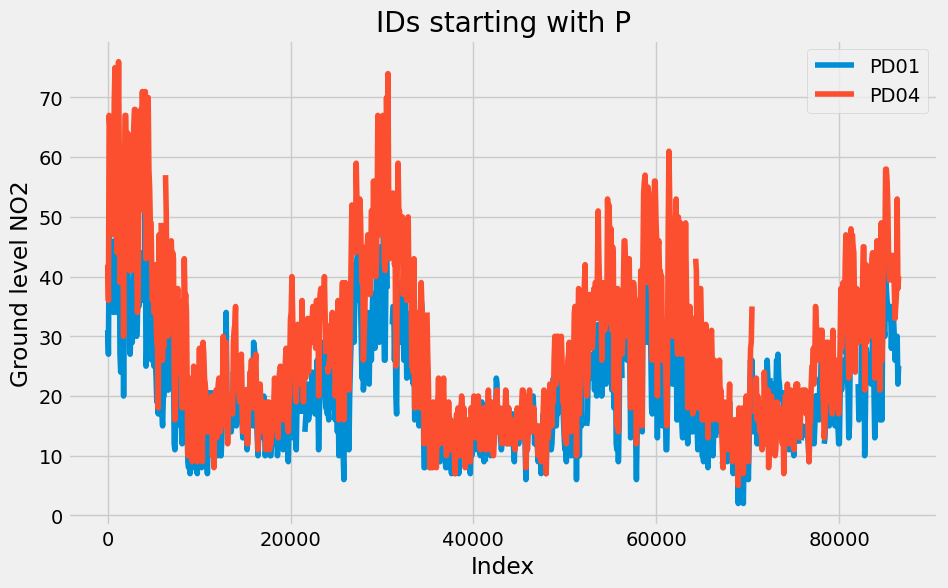

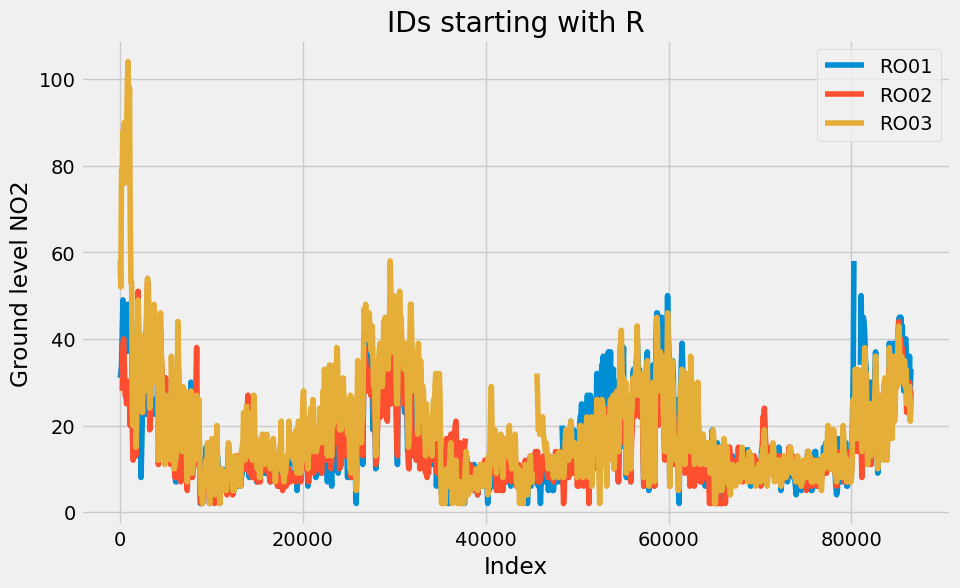

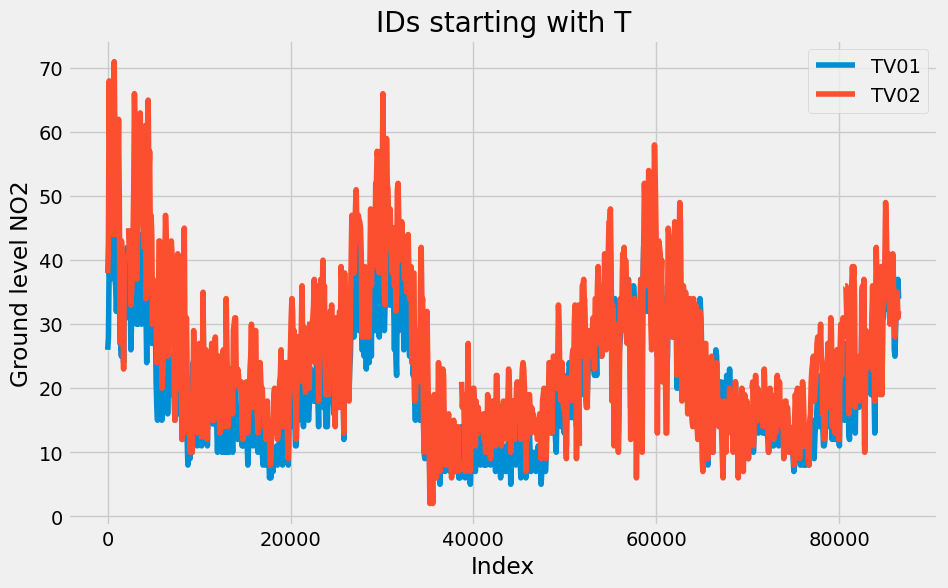

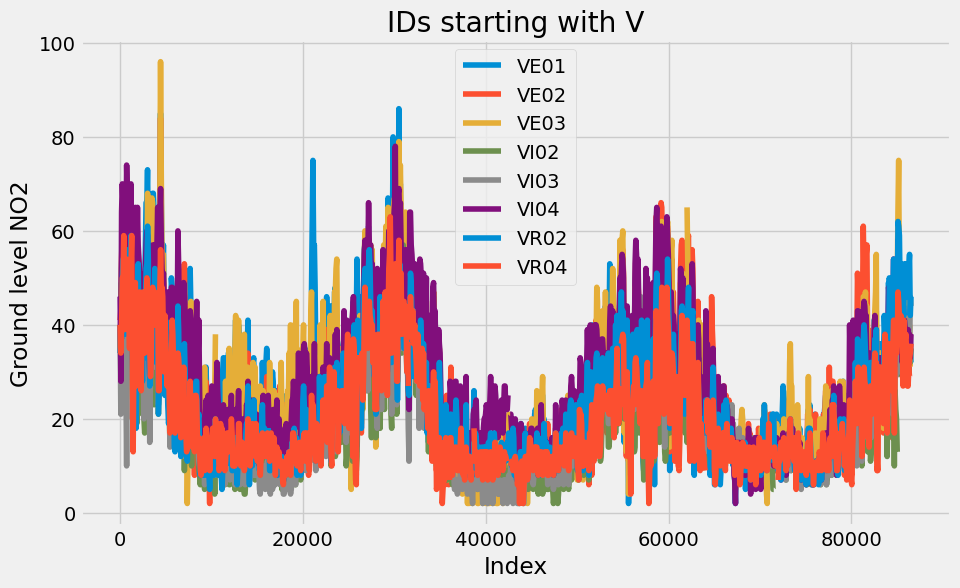

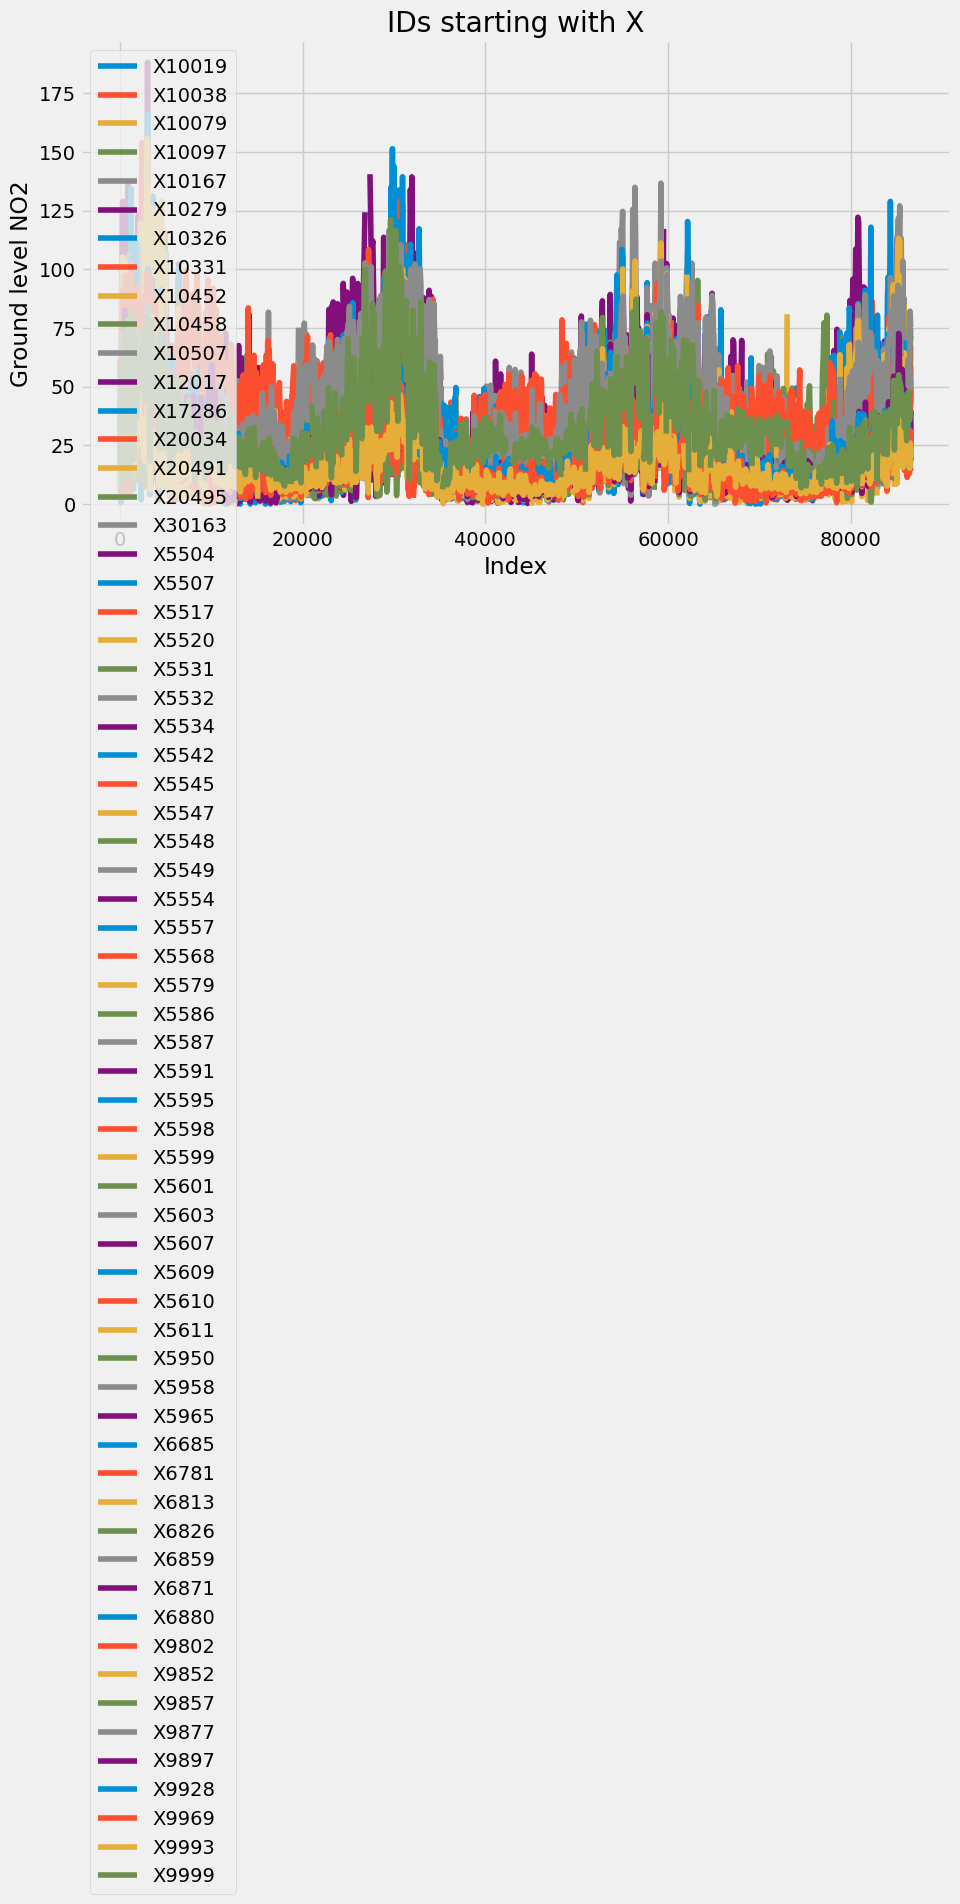

In [15]:
unique_first_letters = train['ID'].str[0].unique()
# Create separate plots for each group
for letter in unique_first_letters:
    temp_df = train[train['ID'].str.startswith(letter)]
    plt.figure(figsize=(10, 6))
    for id in temp_df['ID'].unique():
        id_df = temp_df[temp_df['ID'] == id]
        plt.plot(id_df.index, id_df['GT_NO2'], label=id)
    plt.title(f'IDs starting with {letter}')
    plt.xlabel('Index')
    plt.ylabel('Ground level NO2')
    plt.legend()
    plt.show()

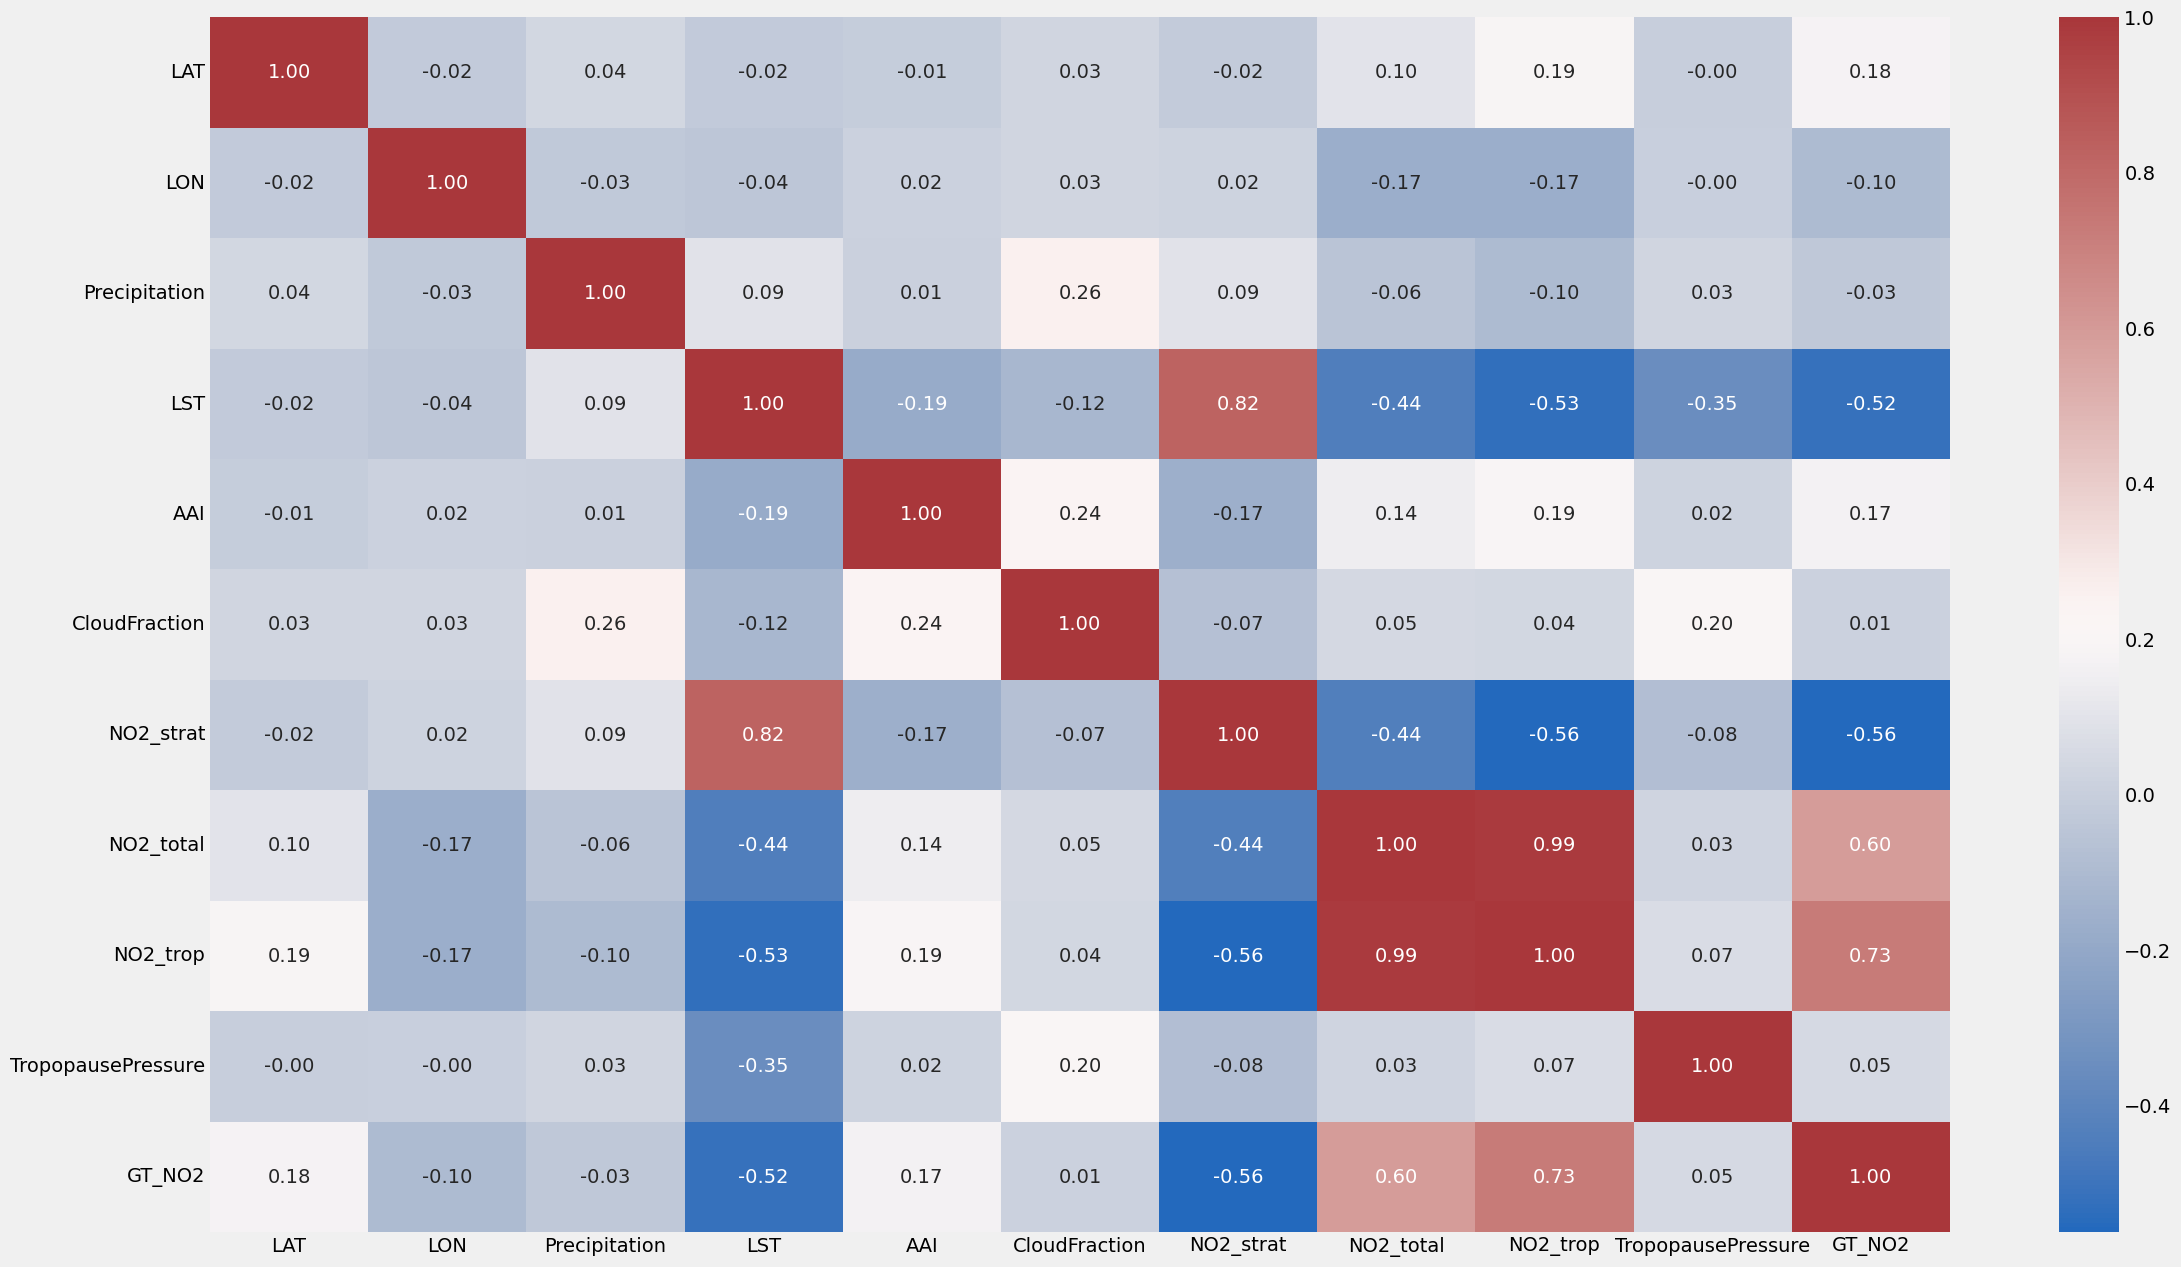

In [16]:
plt.figure(figsize=(25,15))
df_for_plt = train.select_dtypes(include=np.number)

sns.heatmap(df_for_plt.corr(), annot = True, fmt='.2f', cmap='vlag')
plt.show()

<Figure size 2500x1500 with 0 Axes>

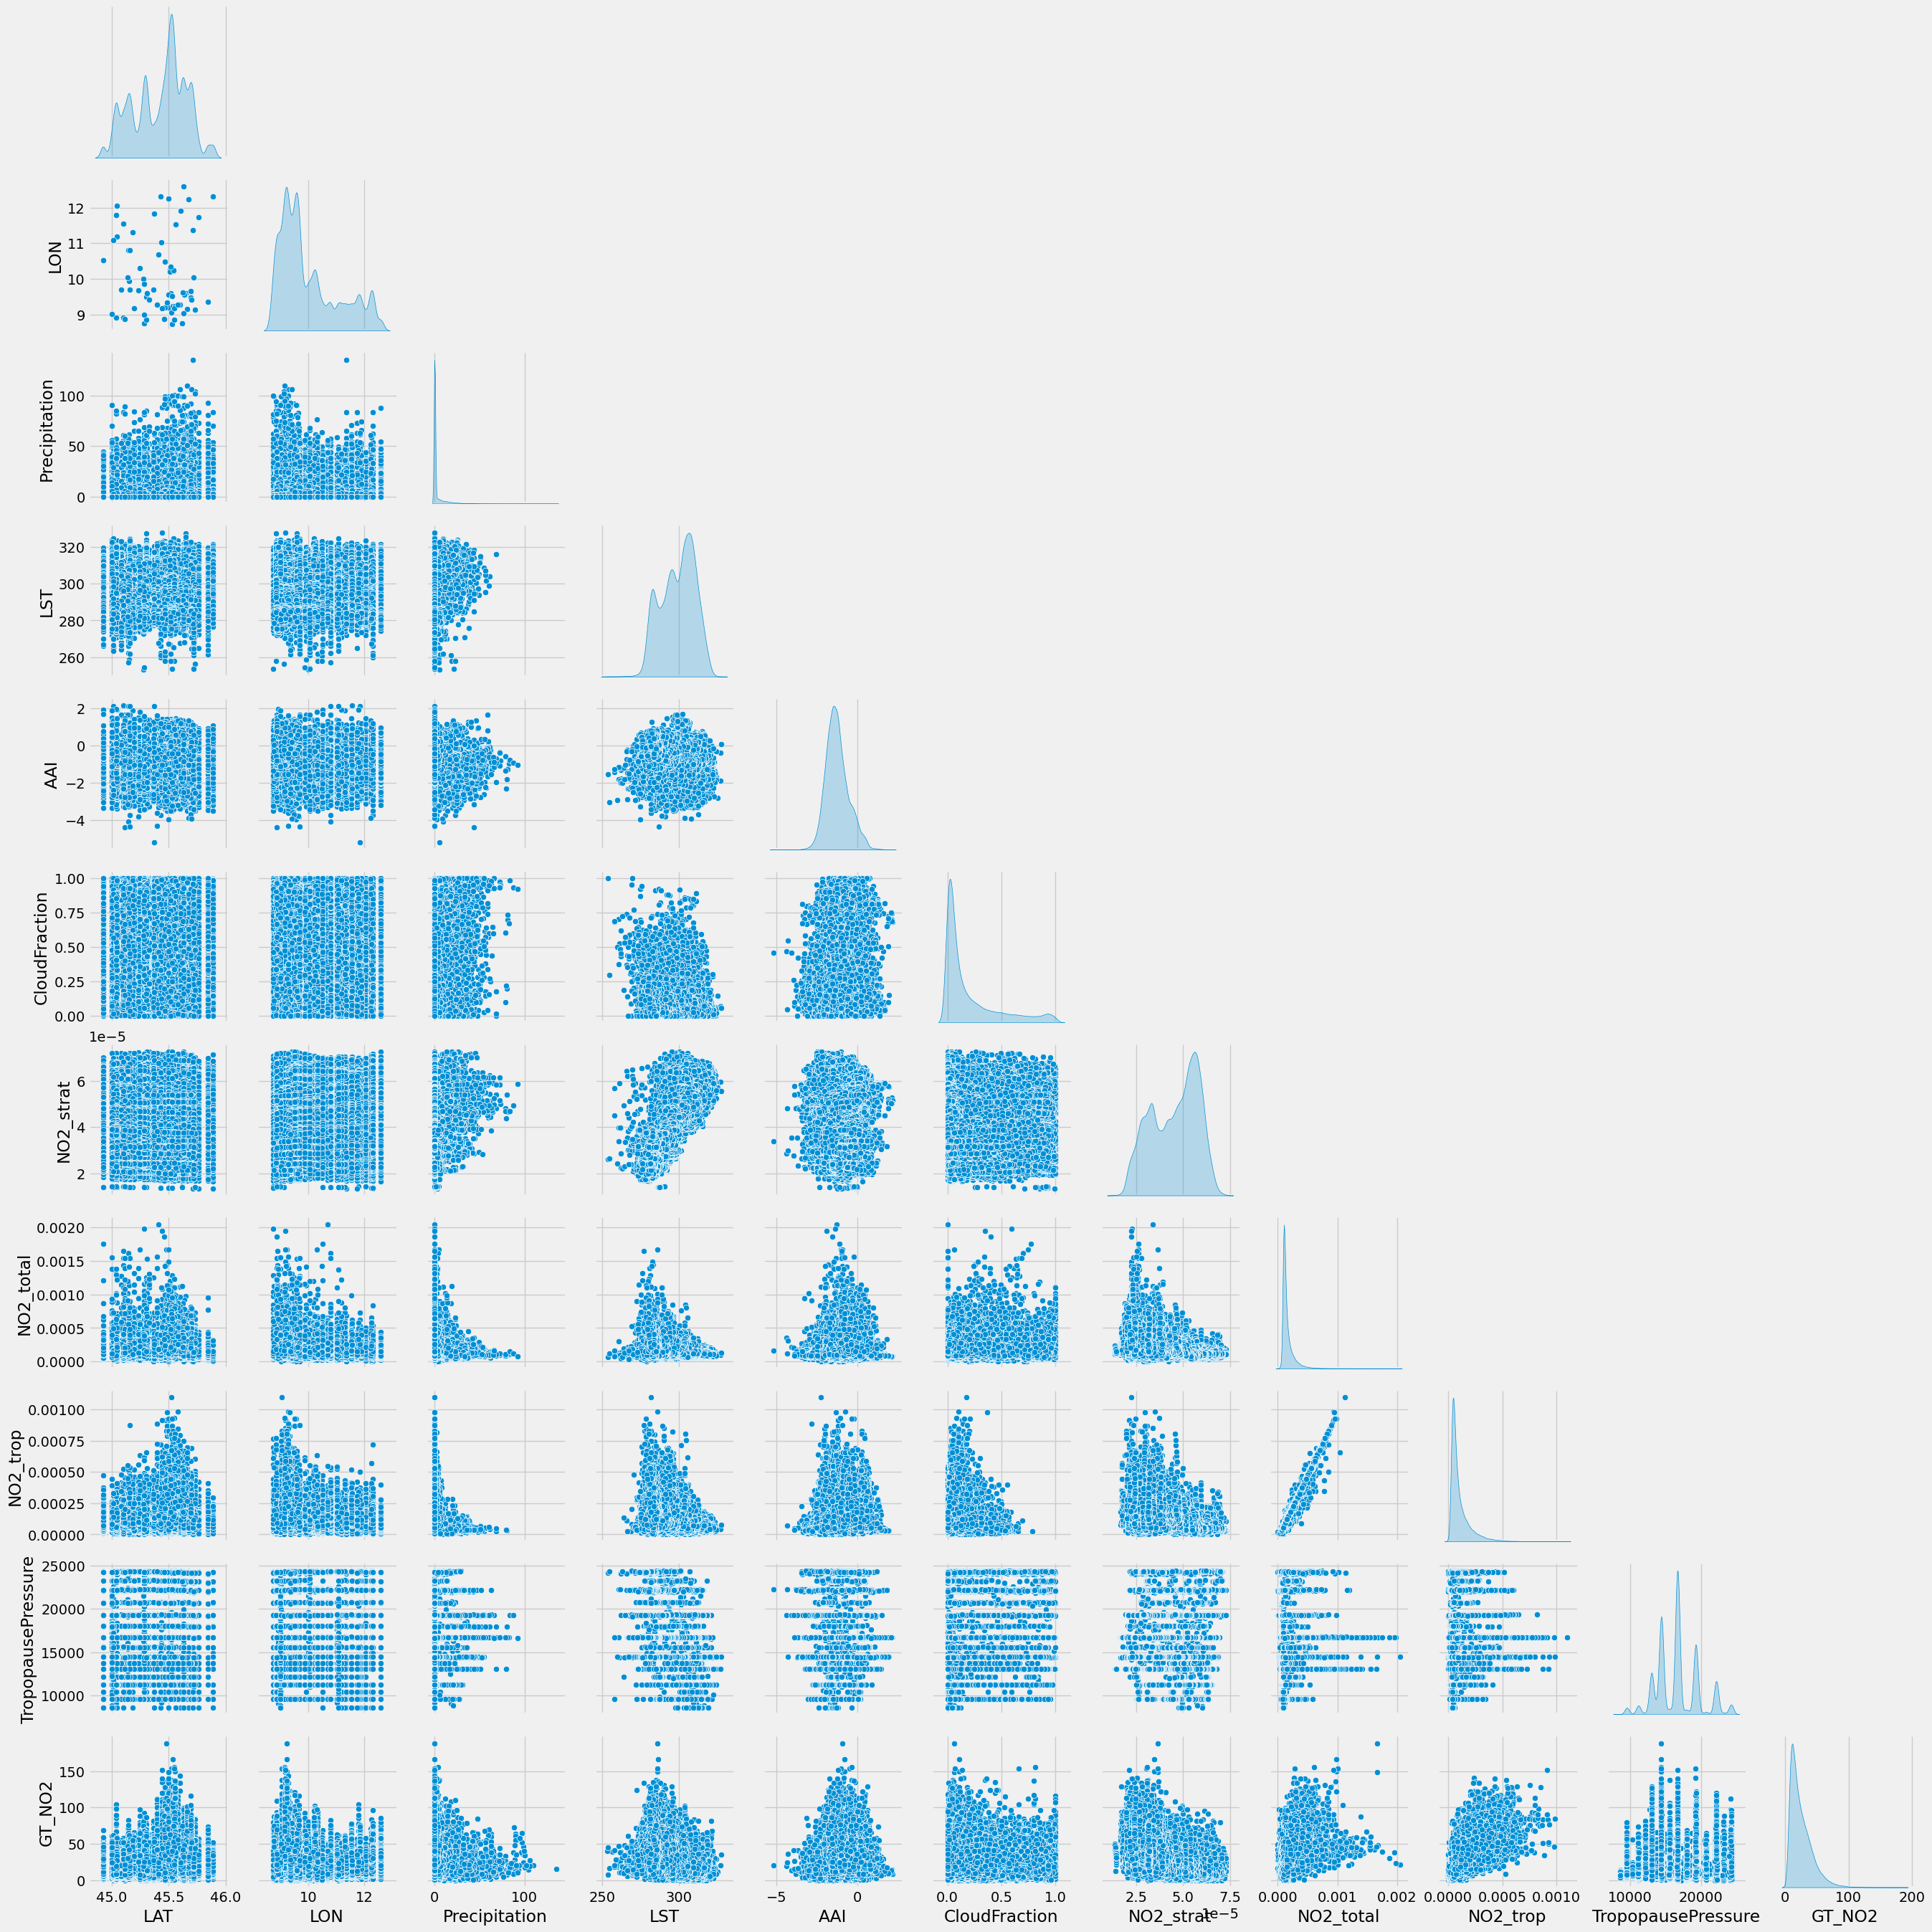

In [17]:
plt.figure(figsize=(25,15))
sns.pairplot(df_for_plt, corner=True, diag_kind='kde')
plt.show()

# Feature Engineering 

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Zindi            86584 non-null  object 
 1   Date                86584 non-null  object 
 2   ID                  86584 non-null  object 
 3   LAT                 86584 non-null  float64
 4   LON                 86584 non-null  float64
 5   Precipitation       86584 non-null  float64
 6   LST                 46798 non-null  float64
 7   AAI                 73709 non-null  float64
 8   CloudFraction       73709 non-null  float64
 9   NO2_strat           73709 non-null  float64
 10  NO2_total           73709 non-null  float64
 11  NO2_trop            51111 non-null  float64
 12  TropopausePressure  73709 non-null  float64
 13  GT_NO2              82051 non-null  float64
dtypes: float64(11), object(3)
memory usage: 9.2+ MB


In [19]:
def create_lag(df, num_lags):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, infer_datetime_format=True)  # Infer date format and use dayfirst if needed
    df['day'] = df['Date'].dt.day
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['week'] = df['Date'].dt.isocalendar().week
    df['weekofyear'] = df['Date'].dt.isocalendar().week
    df['month'] = df['Date'].dt.month
    df['monthofyear'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['quarter'] = df['Date'].dt.quarter
    df.set_index('Date', inplace=True)

    df.sort_values(by=['ID', 'Date'], inplace=True)
    
    # Create lag columns using pd.concat to avoid fragmentation
    lag_dfs = [df]
    for i in range(1, num_lags + 1):
        lag_df = df.groupby('ID')['GT_NO2'].shift(i).rename(f'lag{i}')
        lag_dfs.append(lag_df)
    
    df = pd.concat(lag_dfs, axis=1)
    
    return df

def full_df(df):
    df = df.copy().reset_index()
    df = df.drop(['ID', 'ID_Zindi', 'Date'],axis=1)
    return df


In [20]:
train =create_lag(train, 365)

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\3217544302.py:3: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\3217544302.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [21]:
train = full_df(train)

In [22]:
train.shape

(86584, 385)

# Bi variate

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\3775680700.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




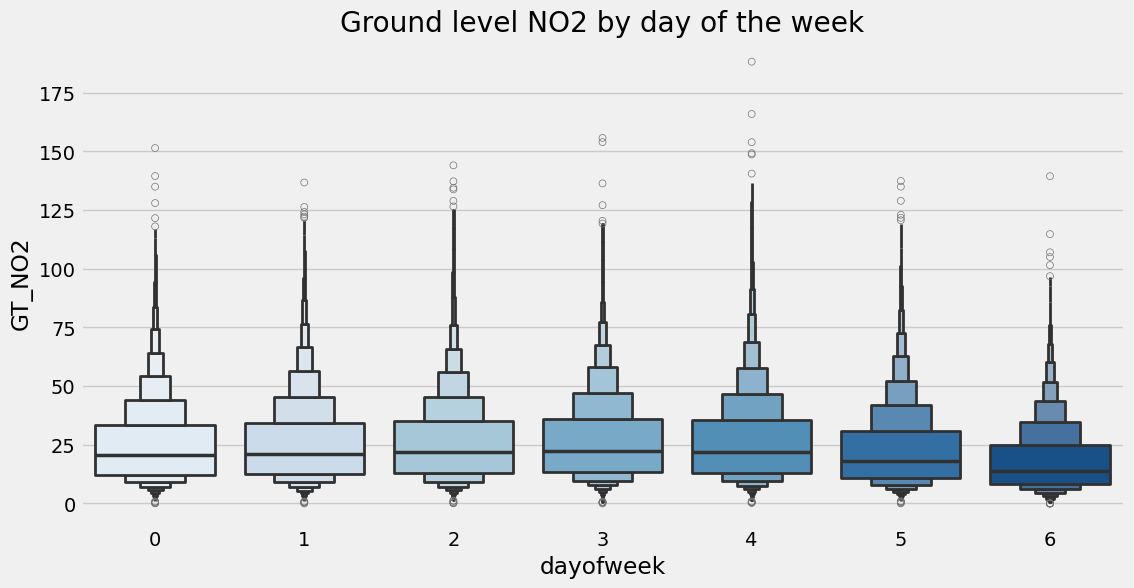

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxenplot(data=train, x='dayofweek', y='GT_NO2', palette='Blues')
ax.set_title('Ground level NO2 by day of the week')
plt.show()

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\3395537786.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




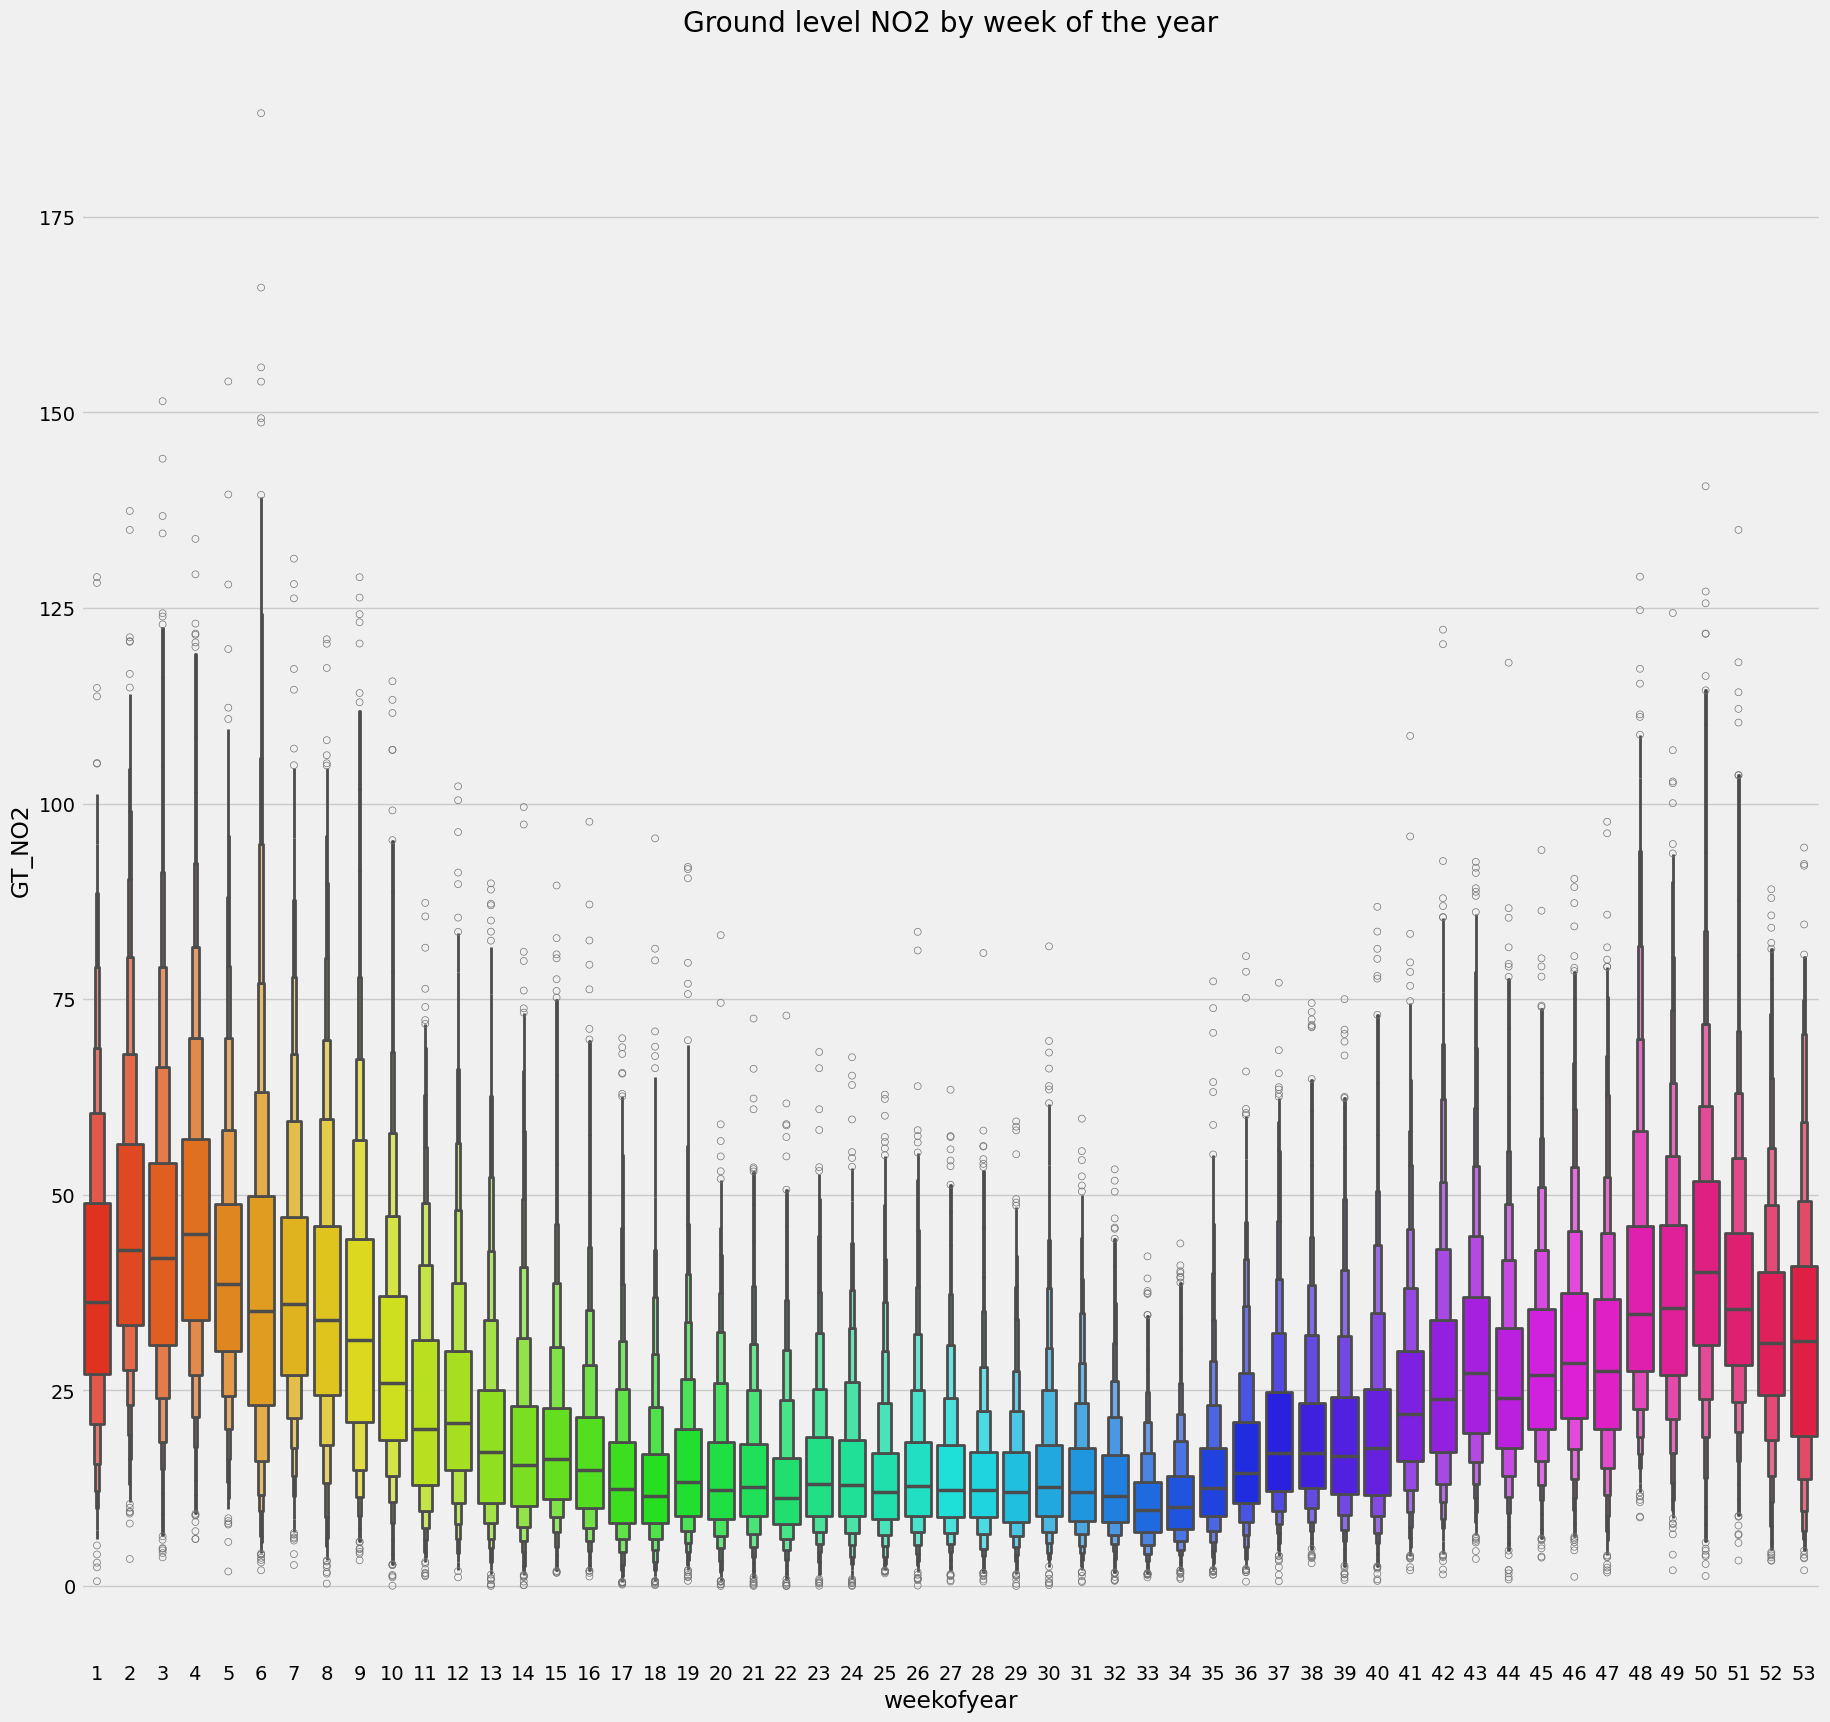

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxenplot(data=train, x='weekofyear', y='GT_NO2', palette='hsv')
ax.set_title('Ground level NO2 by week of the year')
plt.show()

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\4210717914.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




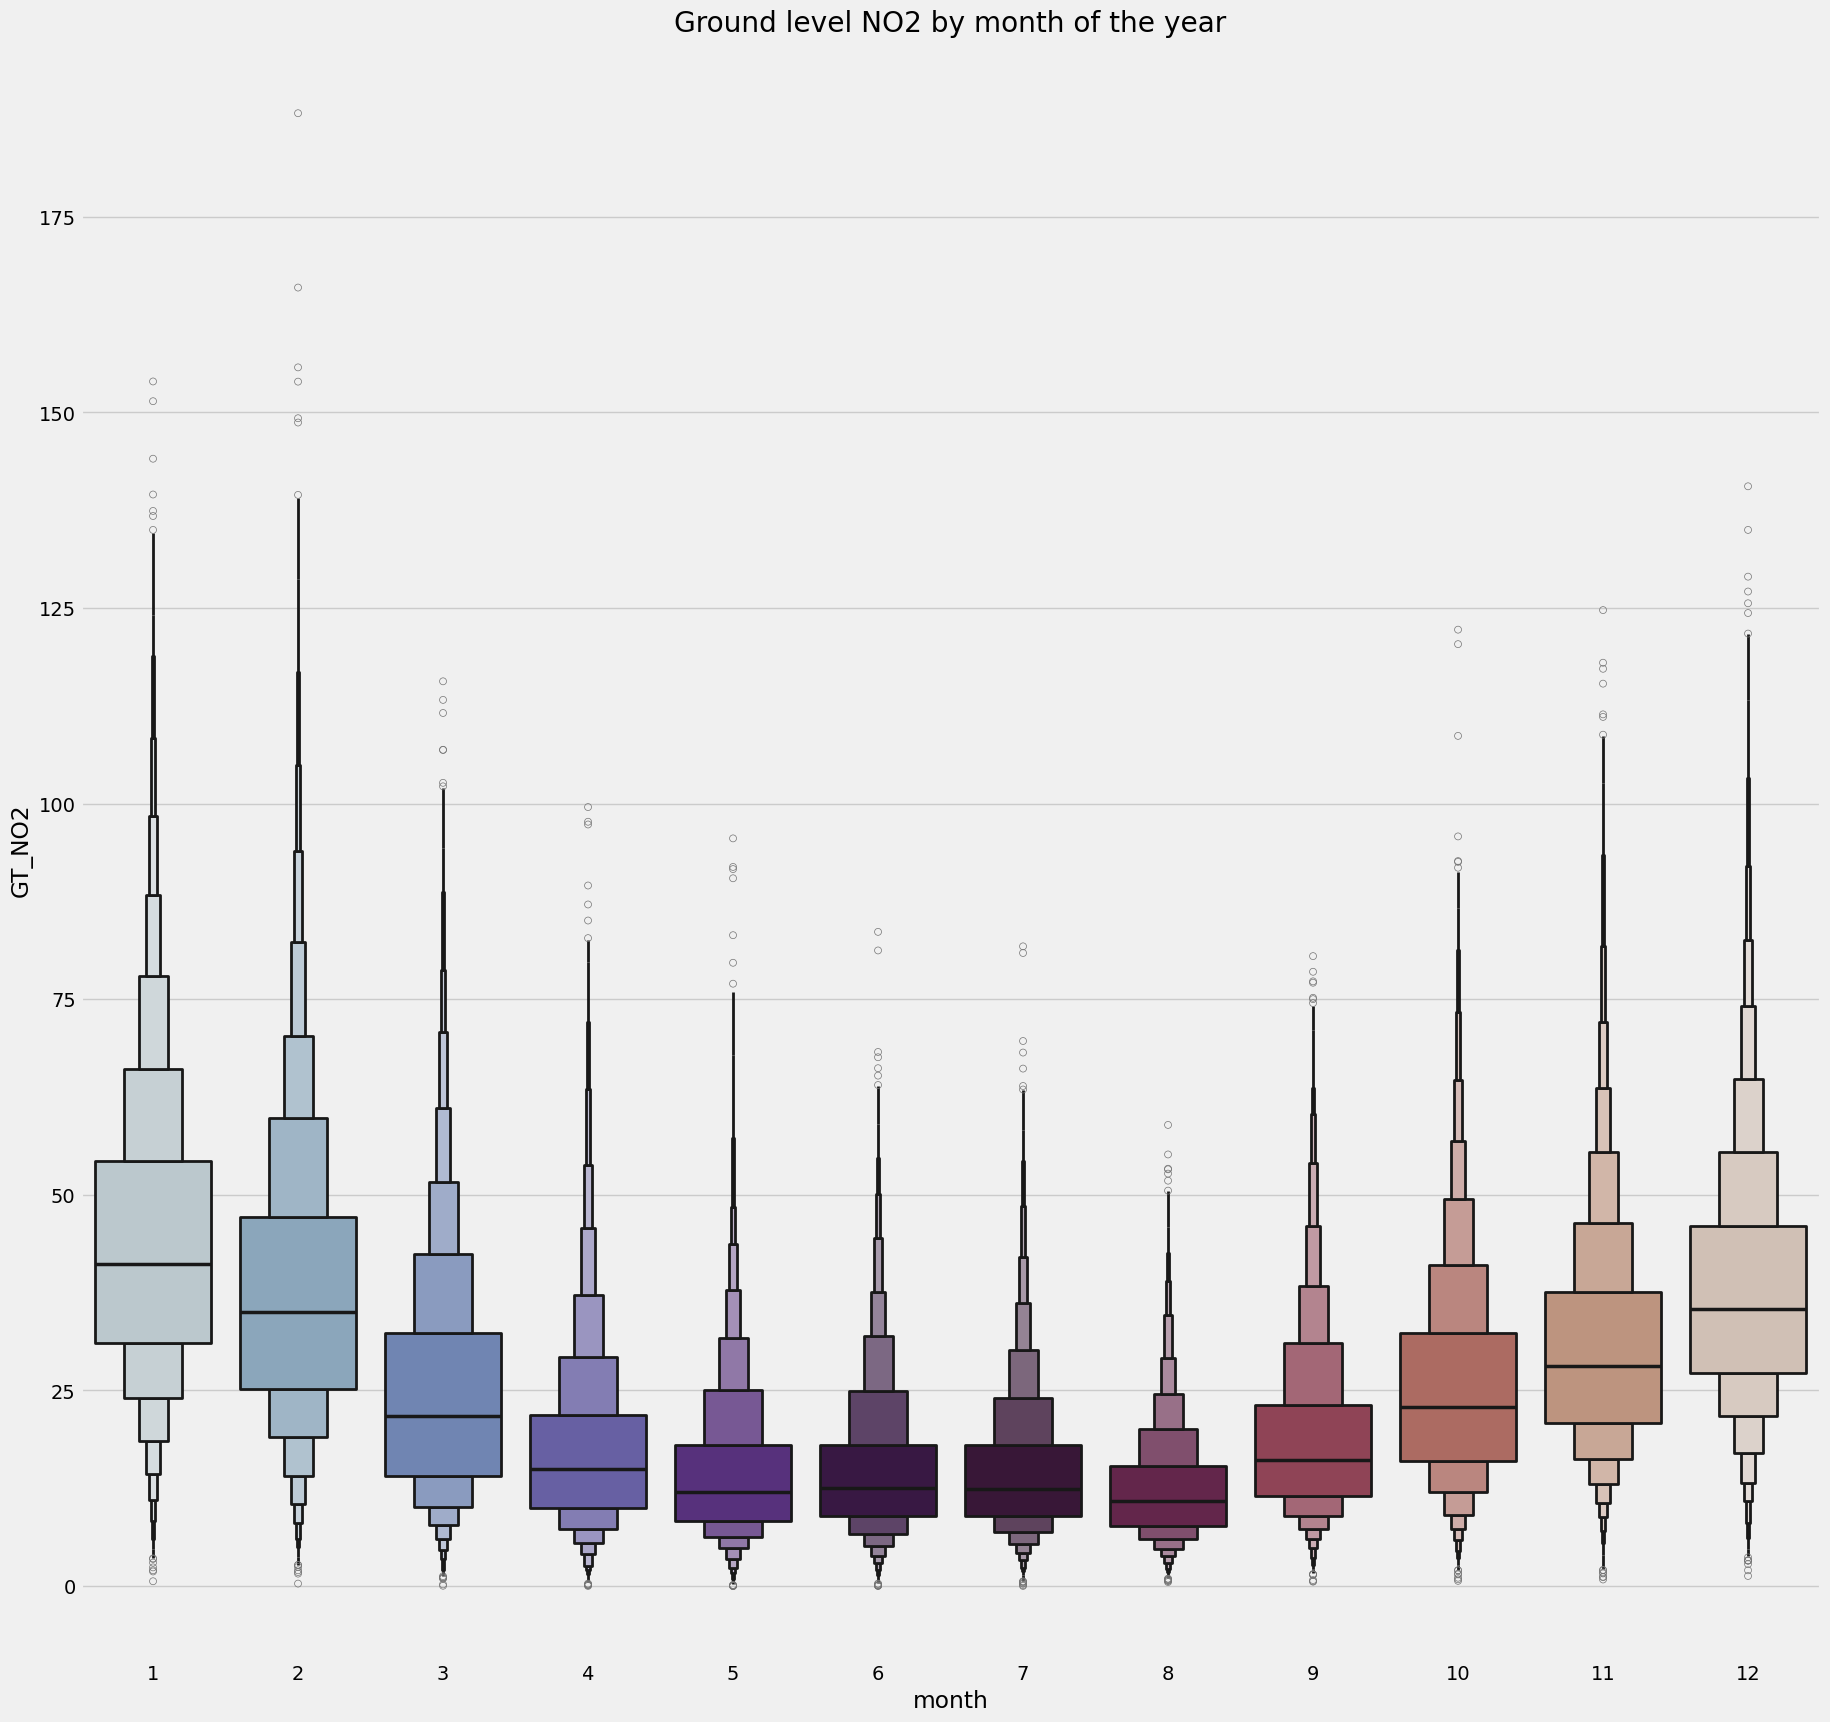

In [25]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxenplot(data=train, x='month', y='GT_NO2', palette='twilight')
ax.set_title('Ground level NO2 by month of the year')
plt.show()

C:\Users\leeno\AppData\Local\Temp\ipykernel_24572\2102990313.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




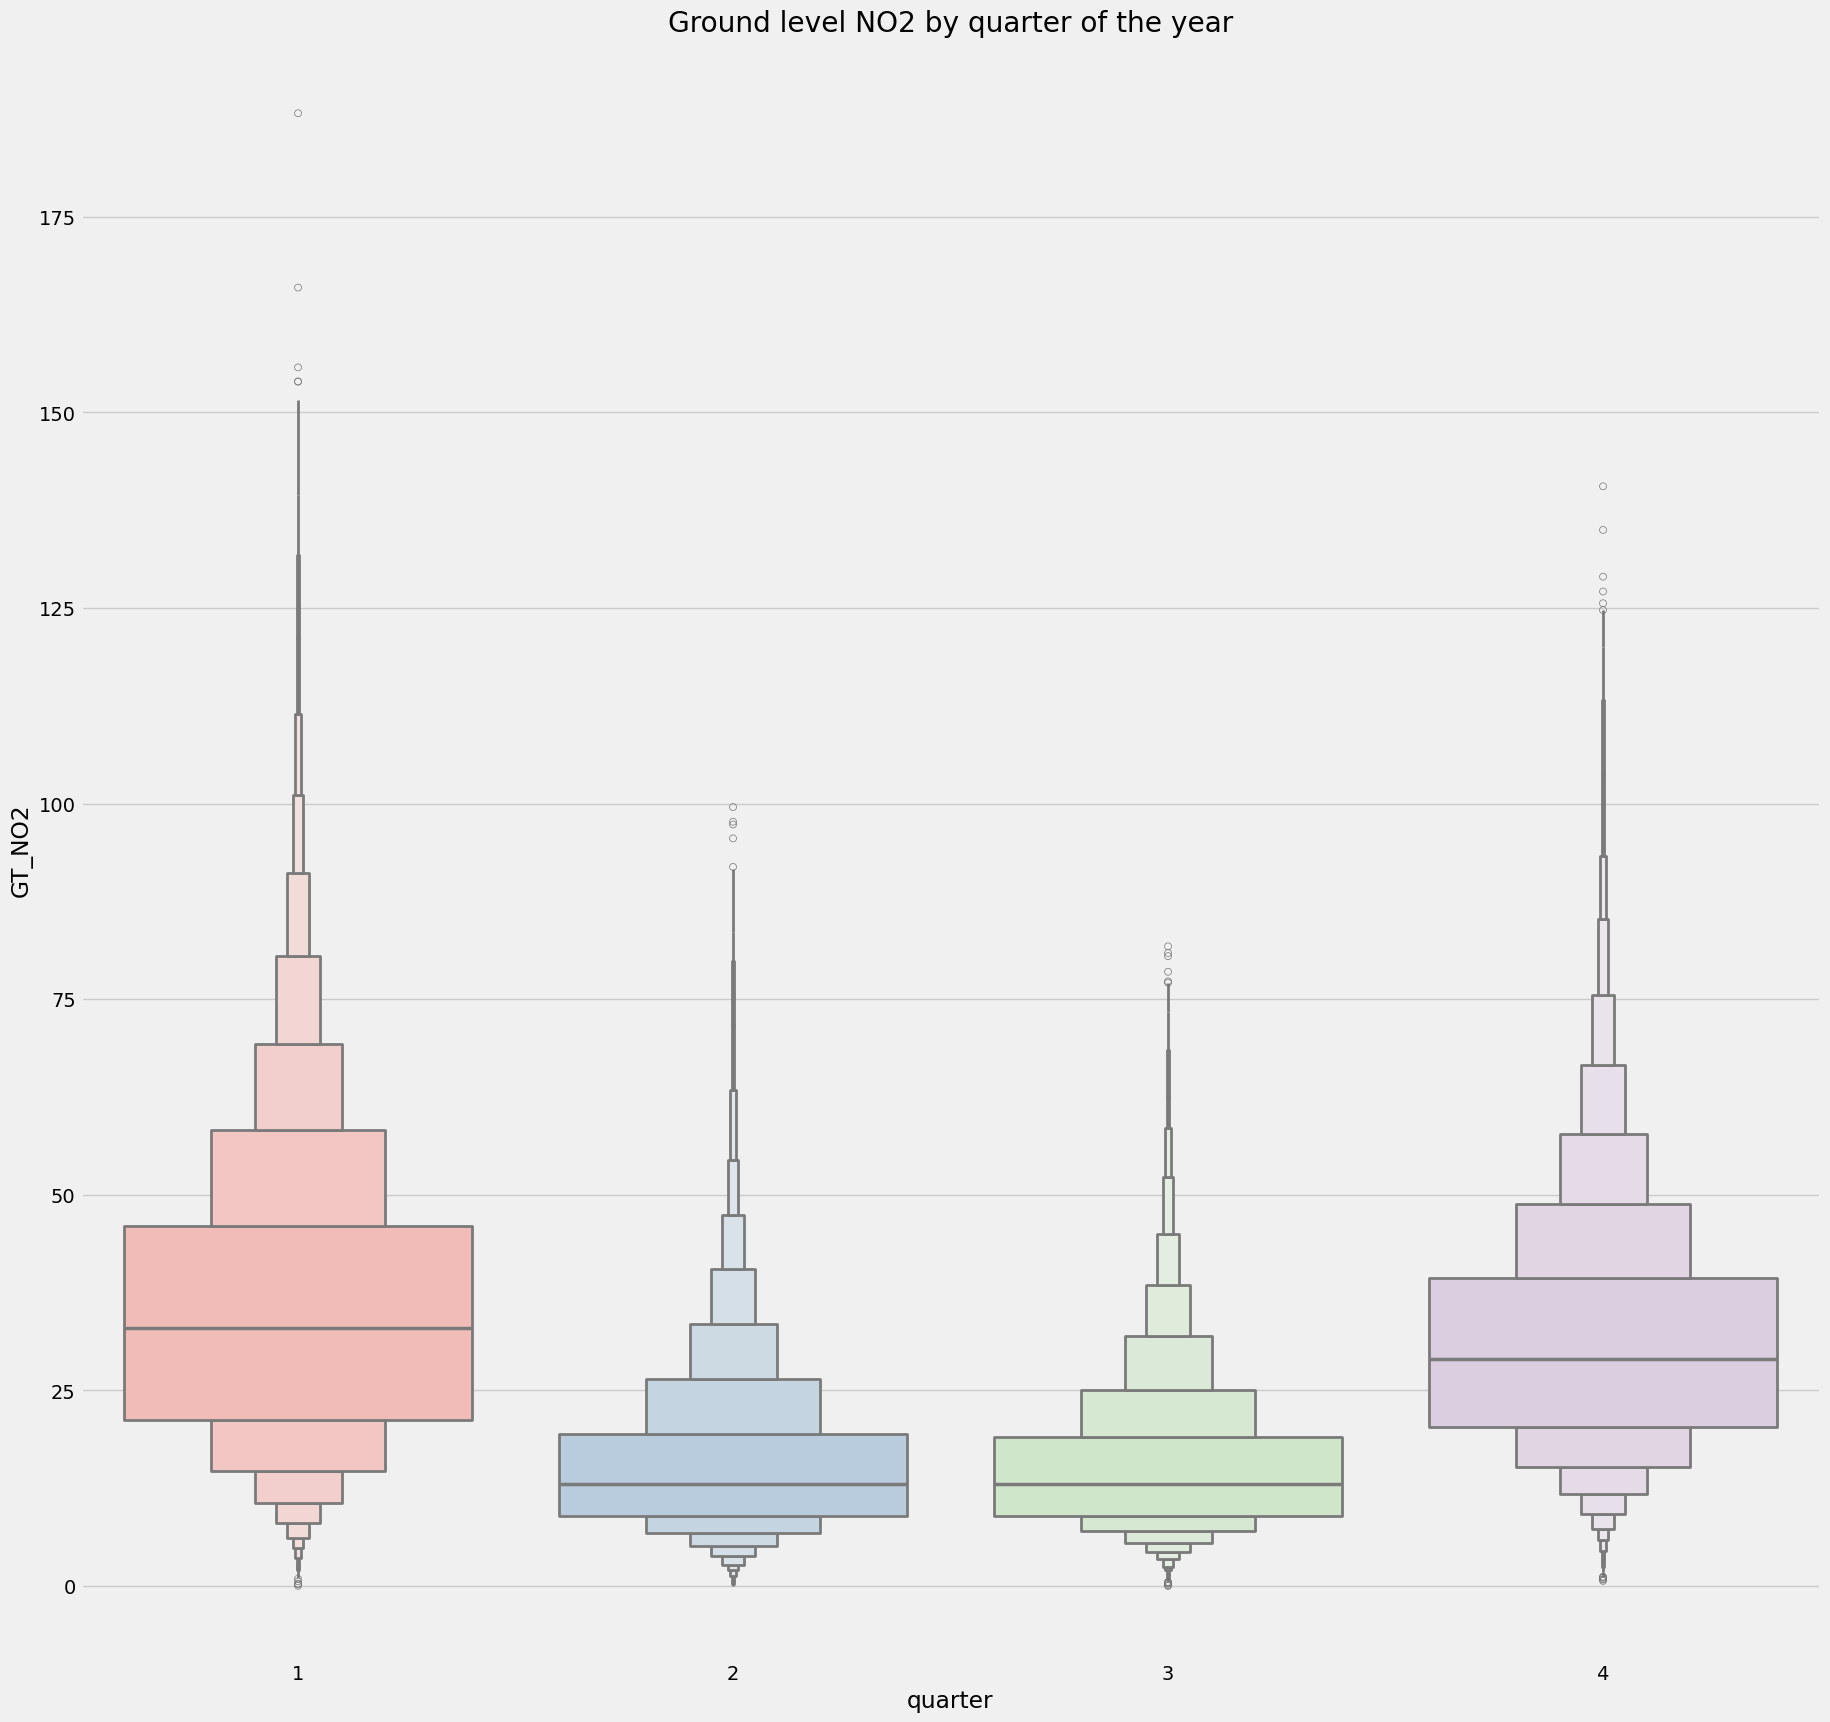

In [26]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxenplot(data=train, x='quarter', y='GT_NO2', palette='Pastel1')
ax.set_title('Ground level NO2 by quarter of the year')
plt.show()

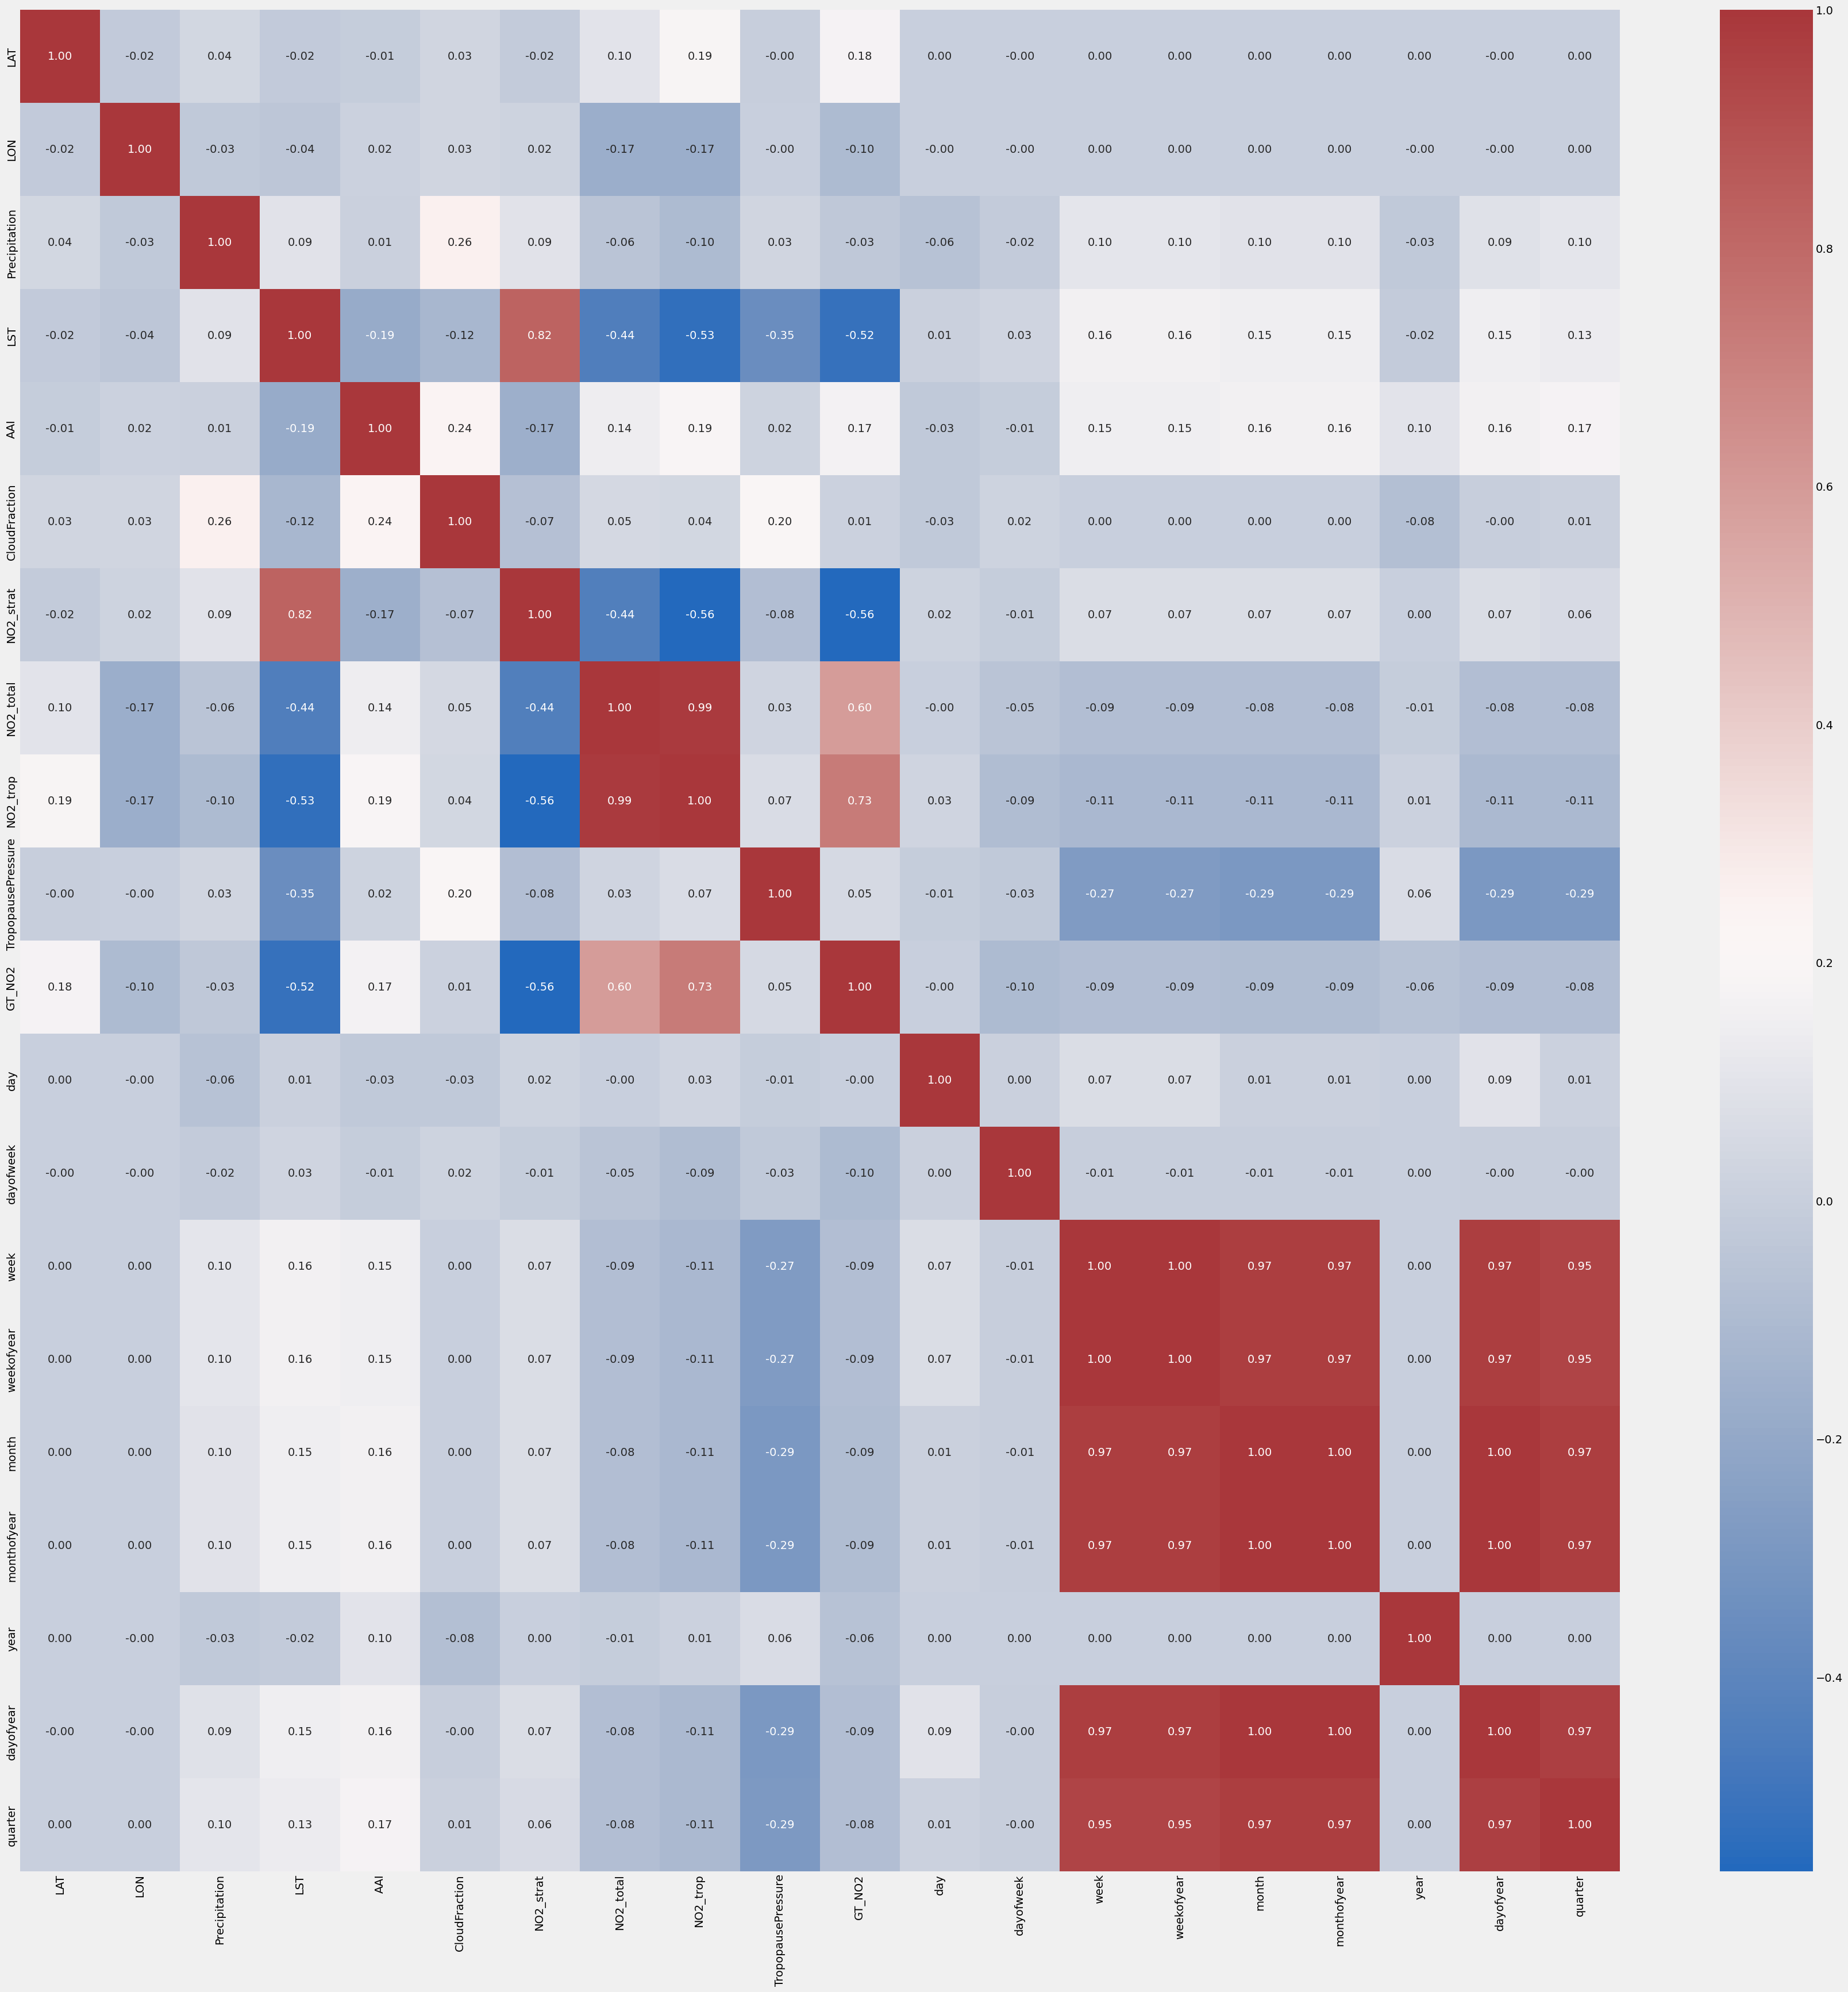

In [27]:
df_plt = train.loc[:, :"quarter"]
plt.figure(figsize=(40, 40))
sns.heatmap(df_plt.corr(), annot = True, fmt='.2f', cmap='vlag')
plt.show()

# Outlier detection

In [33]:
# Calculate Q1, Q3, and IQR
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# Finding lower and upper bounds for all values
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Align the DataFrame and the bounds
aligned_train, aligned_lower = train.align(lower, axis=1, copy=False)
aligned_train, aligned_upper = train.align(upper, axis=1, copy=False)

# Finding outliers
outliers = ((aligned_train < aligned_lower) | (aligned_train > aligned_upper)).sum() / len(train) * 100
outliers

LAT                    0.0
LON                    0.0
Precipitation    20.628523
LST               0.035803
AAI               1.497967
                   ...    
lag361            1.907974
lag362            1.910284
lag363            1.906819
lag364            1.906819
lag365            1.909129
Length: 385, dtype: Float64

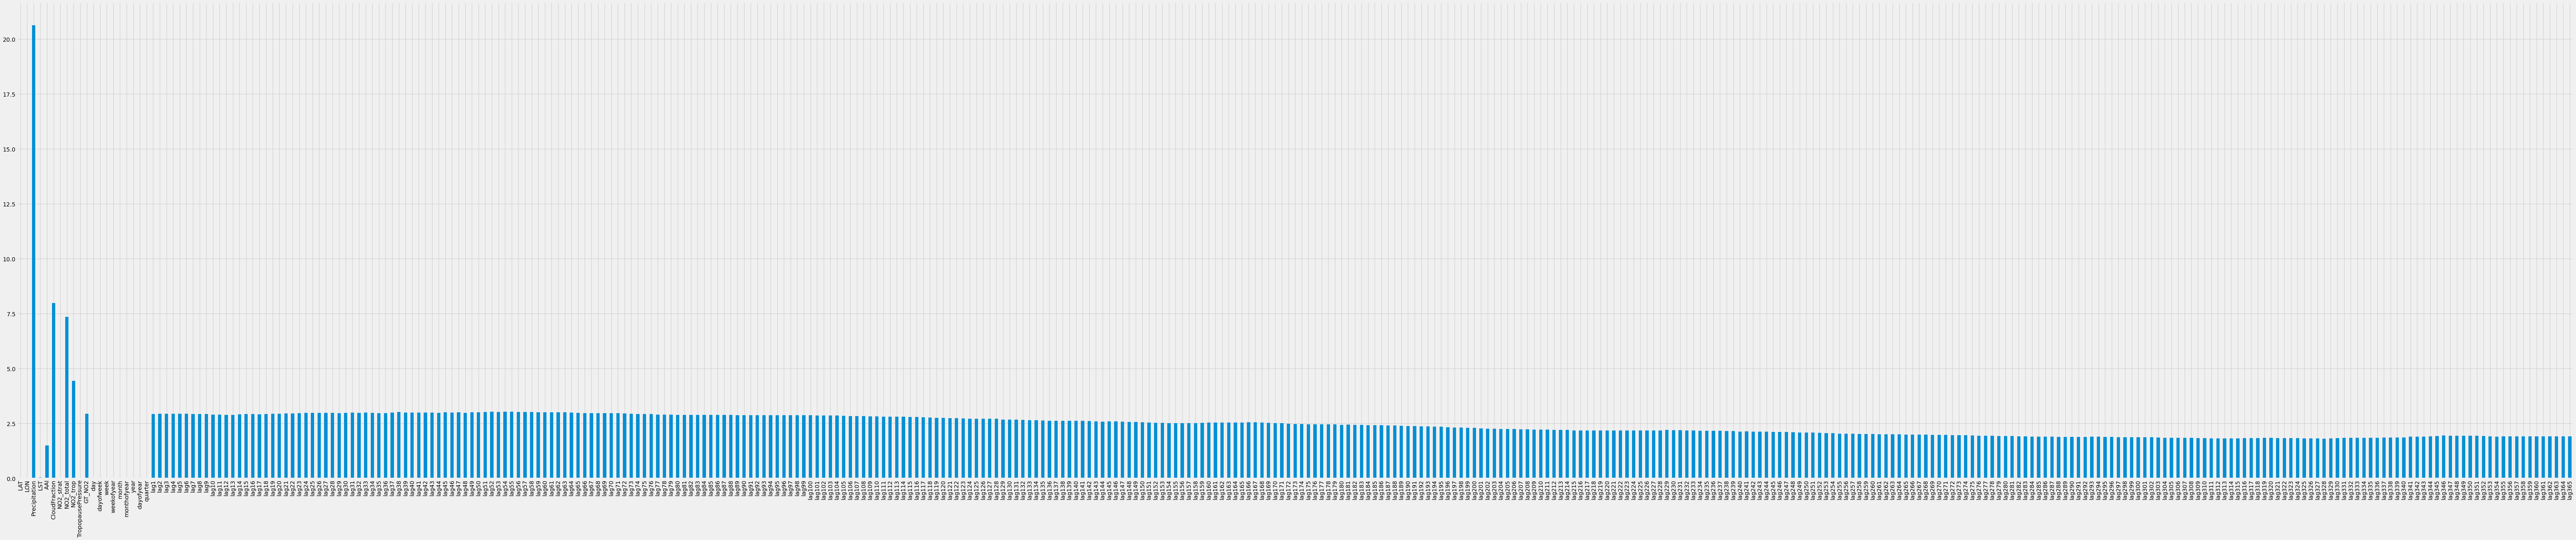

In [39]:
plt.figure(figsize=(100, 20))
outliers.plot.bar()
plt.show()